# Resources 
To go along with this walk through I recommend reading chapter 3 of ISLR, available here: http://www-bcf.usc.edu/~gareth/ISL/index.html

---

# Table of Contents 
* [Chapter 2](#statistical-learning)
    * [What is Statistical Learning](#statistical-learning)
    * [How Do we Estimate f](#estimate-f) 
    * [Prediction Accuracy and Model Interpretability](#accuracy-interpretability) 
    * [Assessing Model Accuracy](#model-accuracy) 
    * [Measuring Quality of fit](#quality-fit) 
    * [Bias-Variance Tradeoff](#bias-variance) 
* [Chapter 3](#chapter-3)
    * [Background](#background)
    * [simple linear regression](#simple-linear-regression)
        * [Estimating the coefficients](#estimating-coefficients)
        * [Assessing the accuracy of the **coefficient estimates**](#accuracy-of-coefficients)
        * [Statistics Background](#statistics-background)
        * [Assessing the accuracy of the **model**](#accuracy-of-model)
    * [Multiple Linear Regression](#multiple-linear-regression)
        * [Estimating the regression coefficients](#multiple-regression-coefficients)
        * [Important Questions](#important-questions)
    * [Other Considerations in the regression model](#other-considerations)
        * [Qualitative predictors](#qualitative-predictors)
        * [Extensions of the linear model](#extensions)
        * [Potential Problems](#problems)
    * [**Final Marketing Plan**](#marketing-plan)
    * [Comparison to K-Nearest Neighbors](#knn)
    
---

# Key Terms
Here is a list of key terms that you can `cmd+f` to learn a bit more about. 
* prediction
* inference
* reducible error
* irreducible error
* parametric
* non-parametric
* Ordinary Least Squares (OLS)
* Mean Squared Error (MSE)
* Bias
* Variance
* Residuals
* Residual Sum of Squares (RSS)
* Population Regression Line 
* Least Squares Regression Line
* Standard Error (SE)
* Residual Standard Error (RSE)
* Confidence Intervals
* Null Hypothesis
* Alternative Hypothesis
* t-statistic
* t-distribution
* P value
* $R^2$ Statistic
* Total Sum of Squares
* Total Variation
* Explained Variation
* Unexplained Variation
* Correlation
* F-statistic
* Prediction interval
* Additive 
* Correlation of error
* Outliers
* Leverage
* Collinearity

# Motivation 
Going through chapter 3 of ISLR is an excellent step to gaining a deeper understanding to machine and statistical learning. I decided to start reading it after going through all of Andrew NG Machine learning course, to futher my understanding of the statistical side of things. However, I found it to be a lot to process all at once. There were a ton of statistical concepts that were being thrown around that I hadn't seen since early college. 

This walk through will go through chapter three, utilizing code and highlighting the main intuitions and take aways the I found during the process. 

Note: at times there may be a slightly repetitive nature to this walk through if you just want through my machine learning perspective tutorial. This is good! It will help the intuitions be more solidified and allow you more time to digest the concepts.

# Chapter 2 - What is Statistical Learning <a class="anchor" id="statistical-learning"></a>
This section is going to be highlighting the main takeaways from chapter 2 of ISLR. I highly encourage you to read it yourself as well!

In general, suppose that we observe a quantitative response $Y$ and $p$ different predictors, $X_1, X_2, . . . , X_p$. We assume that there is some relationship between $Y$ and $X = (X_1,X_2,...,X_p)$, which can be written in the very general form:
$$Y = f(X) + \epsilon$$

Intuitively, what does $f$ represent? It represents the *systematic* information that $X$ provides about $Y$.

Note: $\epsilon$ represents error.

In general the function $f$ may involve more than one input variable.

Here we can see where f involves 1 input variable (years of education):
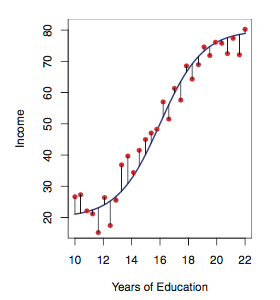
And here where it is based on two (years of education and seniority):
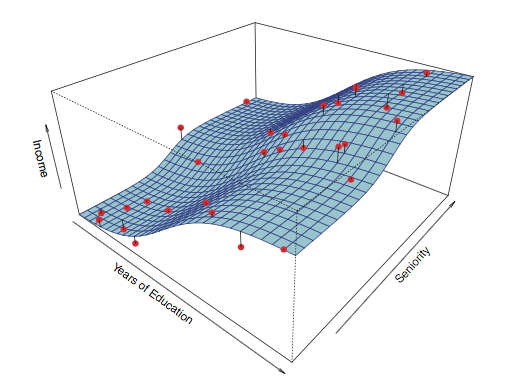

## In essence, statistical learning refers to a set of approaches for estimating $f$

### Why estimate $f$? 
There are two main reasons to estimate $f$:
* prediction
* inference

### Prediction: The first reason to estimate $f$
In many situations, a set of inputs X are readily available, but the output Y cannot be easily obtained. In this setting, since the error term averages to zero, we can predict Y using:
$$\hat{Y} = \hat{f}(X)$$
Where $\hat{f}$ represents our estimate for $f$, and $\hat{Y}$ represents the resulting *prediction* for Y. 

In this setting, $\hat{f}$ is often treated as a black box, in the sense that we aren't really concerned with the form of $\hat{f}$, provided it gives us accurate predictions!

Remember: $f$ is the perfect, real world model. We don't generally have it. $\hat{f}$ is the model that we generate via statistical learning techniques (linear regression being one)!

The accuracy of $\hat{Y}$  as a prediction depends on two quantities:
* **reducible error**
* **irreducible error**

In general, $\hat{f}$ will not be a perfect estimate for $f$, and this inaccuracy will introduce some error. This error is *reducible* because we can potentially improve the accuracy of $\hat{f}$ by using the most appropraite statistical learning technique to estimate $f$. 

However, even if it were possible to form a *perfect* estimate for $f$, so that our estimated response $\hat{Y}$ took the form $\hat{Y} = f(X)$, our prediction would still have some error in it! This is because $Y$ is also a function of $\epsilon$ (recall, $Y = f(X) + \epsilon$), which, by definition, cannot be predicted using $X$! Therefore, variability associated with $\epsilon$ also affects the accuracy of our predictions. This is know as *irreducible* error, because no matter how well we estimate $f$, we cannot reduce the error introduced by $\epsilon$.

**Intuition:** Why is the irreducible error larger than zero? This is because the quantity $\epsilon$ may contain unmeasured variables that are useful in predicting $Y$ - since we don't measure them, $f$ cannot use them in its prediction. The quantity $\epsilon$ may also contain unmeasurable variation. For example, the risk of an adverse reaction in a clinical setting might vary for a given patient on a given day, depending on manufacturing variation in the drug itself or the patient’s general feeling of well-being on that day. These are external factors that are NOT measured. 

Consider a given estimate $\hat{f}$ and a set of predictor $X$, which yields a prediction $\hat{Y} = \hat{f}(X)$. If we assume for a moment that both $\hat{f}$ and $X$ are fixed, then it is easy to show that: 
$$E(Y - \hat{Y})^2 = E[f(X) + \epsilon - \hat{f}(X)]^2$$
$$ = [f(X) - \hat{f}(X)]^2 + Var(\epsilon)$$

Keeping in mind that:
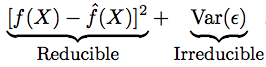

Where $E(Y - \hat{Y})^2$ represents the average, or *expected value* of the squared difference between the predicted and actual value of $Y$, and $Var(\epsilon)$ represents the *variance* associated with the error term $\epsilon$.  

The focus of this walk through is on techniques for estimating $f$ with the aim of minimizing the reducible error.

### Inference: The second reason to estimate $f$
Often times we are interested in understanding the way that $Y$ is affected as $X_1,...,X_p$ change. Here we may wish to estimate $f$ but our goal is not to necessarily make predictions for $Y$. We instead want to understand the relationship between X and Y , or more specifically, to understand how Y changes as a function of $X_1,..., X_p$. Now $\hat{f}$ cannot be treated as a black box, because we need to know its exact form. In this setting, we may be interested in answering the following questions:
1. Which predictors are associated with the response?
    * often only a small fraction of available predictors are substantially associated with $Y$. 
    * we want to identify the most important ones
2. What is the relationship between the response and each predictor?
    * Some predictors may have a positive relationship with Y , in the sense that increasing the predictor is associated with increasing values of Y. 
    * Other predictors may have the opposite relationship.
3. Can the relationship between Y and each predictor be adequately summarized using a linear equation, or is the relationship more complicated?
    * Historically, most methods for estimating f have taken a linear form. 
    * In some situations, such an assumption is reasonable or even desirable. 
    * But often the true relationship is more complicated, in which case a linear model may not provide an accurate representation of the relationship between the input and output variables.
    
### Example: Inference vs. Prediction 
In a real estate setting, one may seek to relate values of homes to inputs such as crime rate, zoning, distance from a river, air quality, schools, income level of community, size of houses, and so forth. In this case one might be interested in how the individual input variables affect the prices—that is, how much extra will a house be worth if it has a view of the river? This is an inference problem. Alternatively, one may simply be interested in predicting the value of a home given its characteristics: is this house under- or over-valued? This is a prediction problem.

Note: Linear models often provide higher BIAS, but are much more interpretable, which is better for inference. 
Non-linear approaches can provide quite accurate predictions for Y, but this comes at the expense of less interpretable models. This make prediction good, but inference more challenging.

## How do we estimate $f$? <a class="anchor" id="estimate-f"></a>
* We will always assume that we have observed a set of $n$ different data points. 
* These observations are called *training data*, because we use these observations to train, or teach, or method how to estimate $f$. 

**Our goal is to apply a statistical learning method to the training data in order to estimate the unknown function $f$**

Mathematically speaking, we want to find a function $f$ such that $Y \approx \hat{f}(X)$ for any observation $(X,Y)$.

Broadly speaking, most statistical learning methods for this task can be characterized as either:
* **Parametric**
* **non-parametric** 

### Parametric methods
Parametric models involve a 2 step model based approach:
1. First, we make an assumption about the function form, or shape, of $f$. As an example, a very simple assumption is that $f$ is linear in $X$:
$$f(X) = \beta_0 + \beta_1X_1 + \beta_2X_2 +...+ \beta_pX_p$$
This is a linear model (with p features).  Once we have assumed that f is linear, the problem of estimating f is greatly simplified. Instead of having to estimate an entirely arbitrary p-dimensional function f(X), one only needs to estimate the p+1 coefficients.
2. After a model has been selected, we need a procedure that uses the training data to *fit* or *train* the model. In the case of the linear model above, we need to estimate the parameters $\beta$. Mathematically that means that we want to find values of the parameters such that: 
$$Y \approx \beta_0 + \beta_1X_1 + \beta_2X_2 +...+ \beta_pX_p$$
This is most commonly done using the **least squares method**

The model-based approach described above is referred to as *parametric* because it reduces the problem of estimating $f$ down to the problem of estimating a set of parameters. 

What is a downside of this approach? That the model we choose will usually not match the true unknown form of $f$.  If the chosen model is too far from the true f, then our estimate will be poor. We can try to address this problem by choosing flexible models that can fit many different possible functional forms for f. But in general, fitting a more flexible model requires estimating a greater number of parameters. These more complex models can lead to a phenomenon known as overfitting (high variance) the data, which essentially means they follow the errors, or noise, too closely.

Lets say that this is the true $f$: 
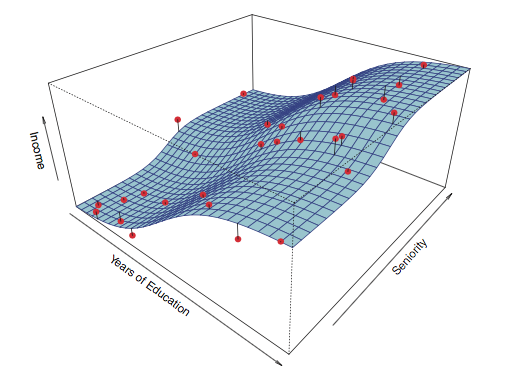

This is the $f$ that our parametric method generates:
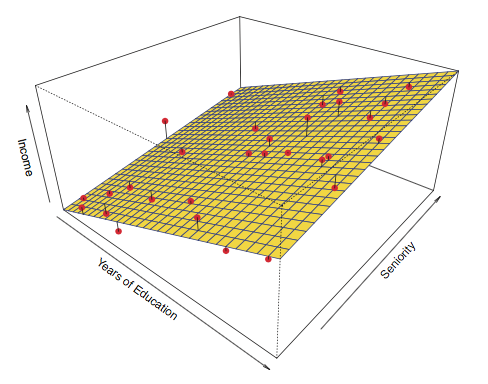

### Non parametric methods
Non-parametric methods do not make explicit assumptions about the functional form of $f$. Instead they seek an estimate of $f$ that gets as close to the data points as possible without being too rough or wiggly. Such approaches can have a major advantage over parametric approaches: by avoiding the assumption of a particular functional form for $f$, they have the potential to accurately fit a wider range of possible shapes for $f$.

Remember: Any parametric approach brings with it the possibility that the functional form used to estimate $f$ is very different from the true $f$. In this case the resulting model will not fit the data well! In contrast, non parametric approaches completely avoid this danger, since essentially no assumption about the form of $f$ is made. 

BUT, non-parametric approaches do suffer from a major disadvantage: since they do not reduce the problem of estimating $f$ to a small number of parameters, a very large number of observations (far more than is typically needed for a parametric approach) is required in order to obtain an accurate estimate for $f$.

This is the $f$ that our non parametric method generates:
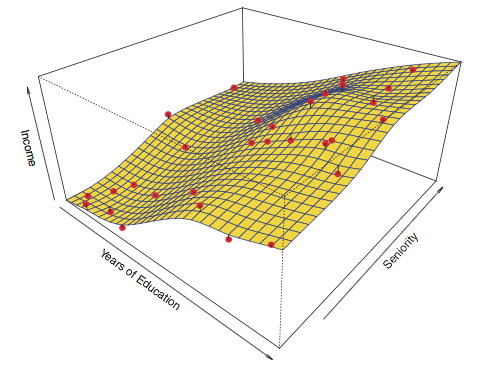
This approach does not impose any pre-specified model of $f$. It instead attempts to produce an estimate for f that is as close as possible to the observed data.

However, this technique can easily over fit the data, seen below (far more variable than the true $f$):
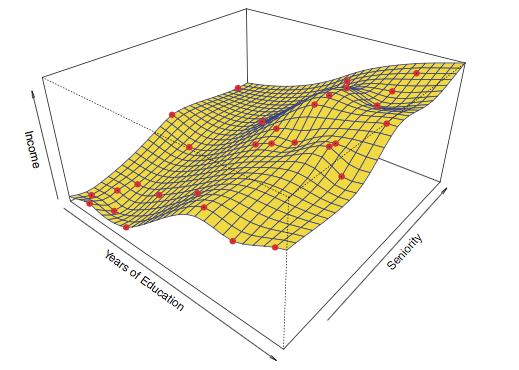

## Trade-off between Prediction Accuracy and Model Interpretability<a class="anchor" id="accuracy-interpretability"></a>
Why would we ever choose to use a more restrictive method instead of a very flexible approach? 

There are several reasons that we might prefer a more restrictive model. If we are mainly interested in inference, then restrictive models are much more interpretable. For instance, when inference is the goal, the linear model may be a good choice since it will be quite easy to understand the relationship between $Y$ and $X_1, X_2,..., X_p$. (a very flexible approach may be a neural network with many hidden layers)

An illustration makes this trade off very clear:
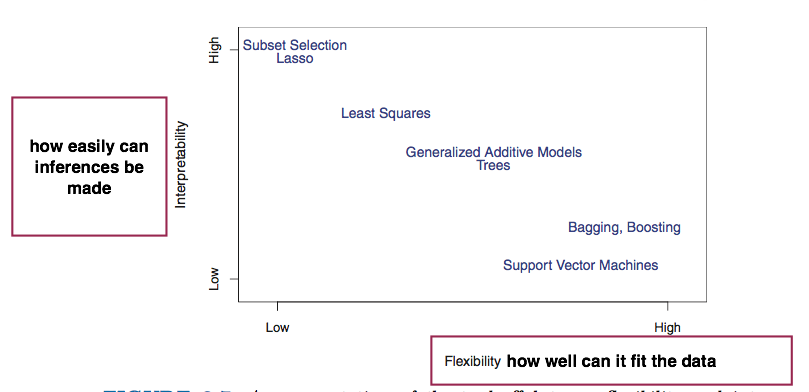

So it is clear that when inference is the goal, there are clear advantages to using simple and relatively inflexible statistical learning methods. 

In some settings, however, we are only interested in prediction, and the interpretability of the predictive model is simply not of interest. For instance, if we seek to develop an algorithm to predict the price of a stock, our sole requirement for the algorithm is that it predict accurately— interpretability is not a concern. In this setting, we might expect that it will be best to use the most flexible model available. Surprisingly, this is not always the case! We will often obtain more accurate predictions using a less flexible method. This phenomenon, which may seem counterintuitive at first glance, has to do with the potential for overfitting in highly flexible methods. Overfitting is when a model displays high variance and tracks the training set too close and doesn't generalize well!

## Assessing Model Accuracy<a class="anchor" id="model-accuracy"></a>
Why is it necessary to introduce so many different statistical learning approaches, rather than just a single best method? There is no free lunch in statistics: no one method dominates all others over all possible data sets. On a particular data set, one specific method may work best, but some other method may work better on a similar but different data set. Hence it is an important task to decide for any given set of data which method produces the best results. Selecting the best approach can be one of the most challenging parts of performing statistical learning in practice.
## Measuring the Quality of Fit<a class="anchor" id="quality-fit"></a>
In order to evaluate the performance of a statistical learning method on a given data set, we need some way to measure how well its predictions actually match the observed data. That is, we need to quantify the extent to which the predicted response value for a given observation is close to the true response value for that observation. In the regression setting, the most commonly-used measure is the **mean squared error**, (MSE), given by:
$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i - \hat{f}(x_i))^2$$
Where $\hat{f}(x_i)$ is our prediction for the $i^{th}$ observation. The MSE will be small if the predicted responses are very close to the true responses, and will be large if for some of the observations, the predicted and true responses differ substantially.

The MSE is computed using the training data that was used tofit the model, and so should more accurately be referred to as the training MSE. But in general, we do not really care how well the method works training on the training data. Rather, we are interested in the accuracy of the predictions that we obtain when we apply our method to previously unseen test data. 

Why is this what we care about? Suppose that we are interested in developing an algorithm to predict a stock’s price based on previous stock returns. We can train the method using stock returns from the past 6 months. But we don’t really care how well our method predicts last week’s stock price. We instead care about how well it will predict tomorrow’s price or next month’s price. On a similar note, suppose that we have clinical measurements (e.g. weight, blood pressure, height, age, family history of disease) for a number of patients, as well as information about whether each patient has diabetes. We can use these patients to train a statistical learning method to predict risk of diabetes based on clinical measurements. In practice, we want this method to accurately predict diabetes risk for future patients based on their clinical measurements. We are not very interested in whether or not the method accurately predicts diabetes risk for patients used to train the model, since we already know which of those patients have diabetes.

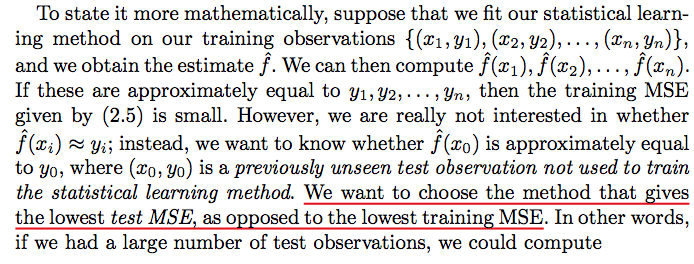

the average squared prediction error for the test observations $(x_0, y_0)$: 
$$Ave(y_0 - \hat{f}(x_0))^2$$

We then want to select the model for which the average of this quantity - the **test MSE** is as small as possible.

How to find the method that minimizes the test MSE? There is no guarantee that the method with the lowest training MSE will also have the lowest test MSE. Roughly speaking, the problem is that many statistical methods specifically estimate coefficients so as to minimize the training set MSE. For these methods, the training set MSE can be quite small, but the test MSE is often much larger. Take a look at the figure below!

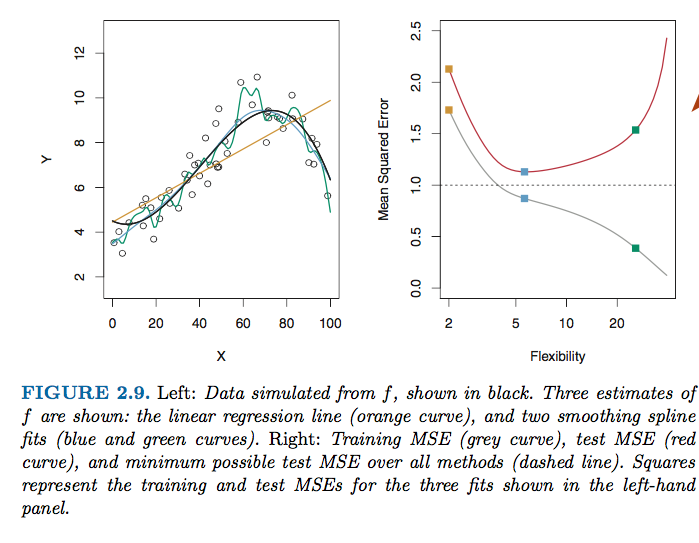

This is a fundamental property of statistical learning that holds regardless of the particular data set at hand and regardless of the statistical method being used. As model flexibility increases, training MSE will decrease, but the test MSE may not. When a given method yields a small training MSE but a large test MSE, we are said to be overfitting the data. This happens because our statistical learning procedure is working too hard to find patterns in the training data, and may be picking up some patterns that are just caused by random chance rather than by true properties of the unknown function f. When we overfit the training data, the test MSE will be very large because the supposed patterns that the method found in the training data simply don’t exist in the test data. Note that regardless of whether or not overfitting has occurred, we almost always expect the training MSE to be smaller than the test MSE because most statistical learning methods either directly or indirectly seek to minimize the training MSE. Overfitting refers specifically to the case in which a less flexible model would have yielded a smaller test MSE.

## Bias-Variance Trade-Off<a class="anchor" id="bias-variance"></a>
In order to minimize the expected test error, we need to select a statistical learning method that simultaneously achieves low variance and low bias. 

What do we mean by the variance and bias of a statistical learning method? 

**Variance** refers to the amount by which $\hat{f}$ would change if we estimated it using a different training data set. Since the training data are used to fit the statistical learning method, different training data sets will result in a different $\hat{f}$. But ideally the estimate for f should not vary too much between training sets. However, if a method has high variance 
then small changes in the training data can result in large changes in $\hat{f}$. In general, more flexible statistical methods have higher variance.

**Bias** refers to the error that is introduced by approximating a real-life problem, which may be extremely complicated, by a much simpler model. For example, linear regression assumes that there is a linear relationship between $Y$ and $X_1, X_2,..., X_p$. It is unlikely that any real-life problem truly has such a simple linear relationship, and so performing linear regression will undoubtedly result in some bias in the estimate of $f$.

Generally, more flexible methods result in less bias. As a general rule, as we use more flexible methods, the variance will increase and the bias will decrease. The relative rate of change of these two quantities determines whether the test MSE increases or decreases. As we increase the flexibility of a class of methods, the bias tends to initially decrease faster than the variance increases. Consequently, the expected test MSE declines. However, at some point increasing flexibility has little impact on the bias but starts to significantly increase the variance. When this happens the test MSE increases.

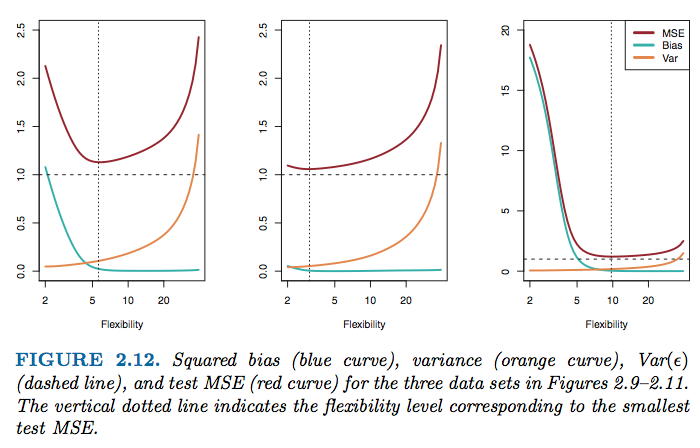

**Note**: How to get around this? Use a low bias algorithm (complex to fit all of the features of the data), that has a TON of training data!

The relationship between bias, variance, and test set MSE displayed in the figure above, is referred to as the bias-variance trade-off. Good test set performance of a statistical learning method requires low variance as well as low squared bias. This is referred to as a trade-off because it is easy to obtain a method with extremely low bias but high variance (for instance, by drawing a curve that passes through every single training observation) or a method with very low variance but high bias (by fitting a horizontal line to the data). The challenge lies in finding a method for which both the variance and the squared bias are low. This trade-off is one of the most important recurring themes that will be discussed in these tutorials.

# Chapter 3 - Introduction <a class="anchor" id="chapter-3"></a>
Linear regression is a very useful tool for predicting a quantitative response. It may seem rather rudementary at times, however, many fancy statistical learning approaches can be seen as generalizations or extensions of linear regression. Consequently, the importance of having a good understanding of linear regression before studying more complex learning methods cannot be overstated.


# 1.0 Background <a class="anchor" id="background"></a>
This walk through is going to be centered around the following scenario:

Imagine you are a statistical consultant and are asked to suggest, based on an advertising data set (capturing the relationship between sales (in thousands of units) as a function of advertising budgets - TV, radio, newspaper). Suppose that you are asked to suggest, based on this data, a marketing plan for the next year that will result in high product sales. What information would be useful in order to provide such a recommendation?

## Questions to ask
As with any problem you are first faced with, you are going to want to start by figuring out exactly what you need to solve. Asking intitial questions is a great way to narrow your focus and start honing in on the important aspects of the situation presented.

1. ### Is there a relationship between advertising budget and sales? 
    * Determining this is our first goal
    * If there is only weak evidence of an association between advertising expenditure and sales, you could argue that *no* money should be spent on advertising!
2. ### How strong is the relationship between advertising budget and sales?
    * In other words, given a certain advertising budget, can we predict sales with a high level of accuracy? 
    * That would be a *strong* relationship
    * Or, on the other hand, is a prediction of sales based on advertising expenditure only slightly better than a random guess?
    * This would be a *weak* relationship
3. ### Which media contribute to sales?
    * Do all three media (TV, radio, newspaper) contribute to sales?
    * Or do just one or two?
    * To do this we must find a way to separate out the individual effects of each medium when we have spent money on all three media
4. ### How accurately can we estimate the effect of each medium on sales?
    * For every dollar spent on advertising in a particular medium, by what amount will sales increase?
    * How accurately can we predict this?
5. ### How accurately can we predict future sales?
    * For a given level of TV, radio, or newspaper advertising, what is our prediction for sales?
    * and what is the accuracy of this prediction?
6. ### Is the relationship Linear?
    * If there is approximately a straight-line relationship between advertis- ing expenditure in the various media and sales, then linear regression is an appropriate tool.
    * If not, it still may be possible to transform the predictor of the response so that linear regression can be used
7. ### Is there synergy among the advertising media?
    * Perhaps spending \$50,000 on television advertising and \$50,000 on radio advertising results in more sales than allocating \$100,000 to either television or radio individually. 
    * In marketing, this is known as a synergy effect, while in statistics it is called an interaction effect.
    
As we move forward, we want to keep these questions in mind as these are what we are trying to answer!

# Explore the Data
Lets quickly take a look at the data set and get a visual idea of the interactions.

In [1]:
# start with the necessary imports we will need for this walk through
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.notebook_repr_html', False)
 
%matplotlib inline
plt.style.use('seaborn-white')

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
advertisingData = pd.read_csv('Advertising.csv', usecols=[1,2,3,4])

In [4]:
advertisingData.head()

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [5]:
advertisingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
advertisingData.describe()

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

We can see that there are 200 training examples (different locations that spend varying amounts of money on advertising - TV, radio, newspaper - and the output sales). 

Lets quickly take a look a the plots of each.

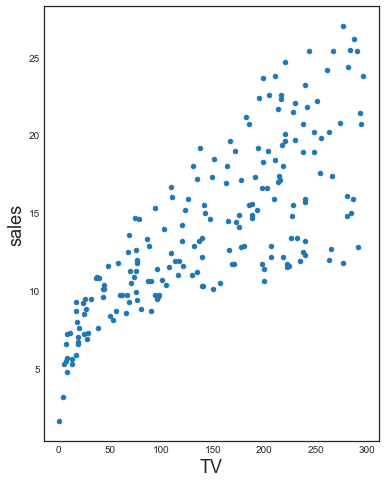

In [7]:
advertisingData.plot(kind='scatter', x='TV', y='sales', figsize=(6,8))
plt.xlabel('TV', fontsize=18)
plt.ylabel('sales', fontsize=18)

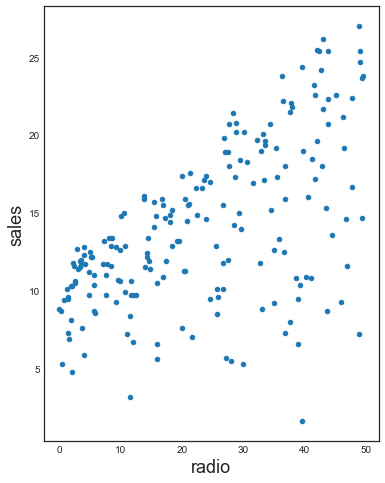

In [8]:
advertisingData.plot(kind='scatter', x='radio', y='sales', figsize=(6,8))
plt.xlabel('radio', fontsize=18)
plt.ylabel('sales', fontsize=18)

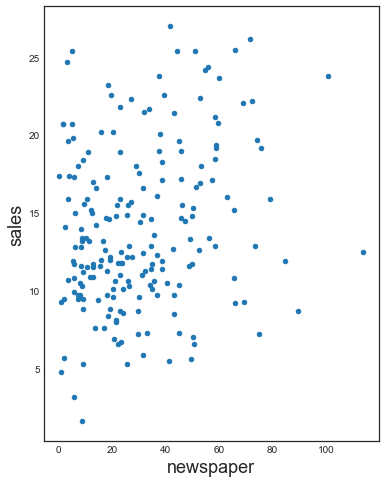

In [9]:
advertisingData.plot(kind='scatter', x='newspaper', y='sales', figsize=(6,8))
plt.xlabel('newspaper', fontsize=18)
plt.ylabel('sales', fontsize=18)

# 1.1 Simple Linear Regression<a class="anchor" id="simple-linear-regression"></a>

Simple linear regression lives up to its name: it is a very straightforward approach for predicting a quantitative response Y on the basis of a single predictor variable $X$. It assumes that there is approximately a linear relationship between $X$ and $Y$. Mathematically, this linear relationship can be expressed as: 
$$Y \approx \beta_0 + \beta_1X$$

For example, $X$ may represent TV advertising and $Y$ may represent Sales:

$$Sales \approx \beta_0 + \beta_1*TV$$

In the above equations, $\beta_0$ and $\beta_1$ are known as model coefficients, or **parameters**. 

We can predict future sales on the basis of a particular value of TV advertising by computing:
$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$$

where $\hat{y}$ indicates a prediction of $Y$ based on $X = x$

## 1.1.1 Estimating the Coefficients<a class="anchor" id="estimating-coefficients"></a>
In practice the $\beta$ values are unknown. so before we can use the above equation to make predictions, we must use the data to estimate the coefficients. 

Let $(x_1,y_1),(x_2,y_2),...,(x_n,y_n)$ represent $n$ observation pairs, each which has a measurement of $X$ and a measurement of $Y$. In our advertising example, the data set consists of the advertising budget and product sales in $n$ = 200 different markets. 

Our Goal: To obtain coefficient estimates such that the linear model fits the available data well. In other words, so that: 
$$y_i \approx \hat{\beta_0} + \hat{\beta_1}x_1$$ 
for $i$ = 1,...,$n$

Essentially, **we want to find an intercept $\hat{\beta_0}$ and a slope $\hat{\beta_1}$ such that the resulting line is as close as possible to the n = 200 data points.**

There a number of ways to measure *closeness*. However, the most common way by far involves minimizing the *least squares* criterion. 

### What is the goal of the least squares approach? Minimize the grey lines!
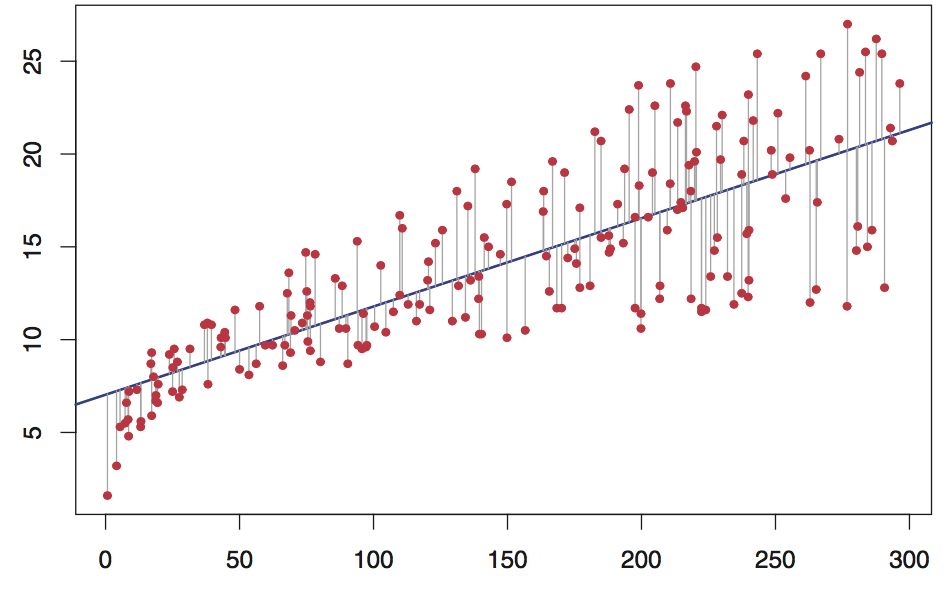

Lets take a look at how the least squares fit looks with code (it should match the image above.

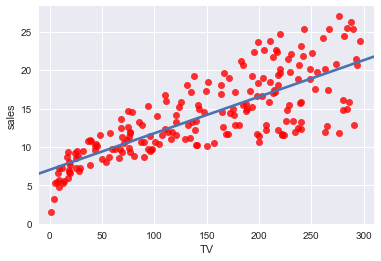

In [10]:
sns.set(font_scale=1)
sns.regplot(advertisingData.TV, advertisingData.sales, order=1, ci=None, scatter_kws={'color':'r'})
plt.xlim(-10,310)
plt.ylim(ymin=0);

We can see that out method of computing the regplot worked well in minimizing the grey lines- we have the exact fit as we were supposed to!

Lets take a look at the math involved...

Let: 
$$\hat{y_i} = \hat{\beta_0} + \hat{\beta_1}x_i$$
be the prediction for $Y$ based on the ith value of $X$.

Then, 
$$e_i = y_i - \hat{y_i}$$
represents the $ith$ *residual*- in other words the difference between the ith observed response value and the ith response value that is predicted by our linear model. When all of these residual errors are summed together, we have the ***residual sum of squares*!

### Residual Sum of Squares - think COST FUNCTION!
Just think about the grey lines in the image above! Each one is a residual error! Here we are going to square each and sum them up to get our total Residual Sum of Squares (RSS) value! This is essentially the **cost function**

$$RSS = e^2_1 + e^2_2 +...+ e^2_n = (y_1)$$

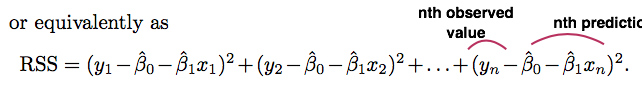

### The least squares approach chooses $\hat{\beta_0}$ and $\hat{\beta_1}$ to minimize the RSS
Again, remember: this just means we are trying to reduce the sum of the grey lines in the image above!!!

Lets now calculate the RSS with a bit of code!

In [11]:
# calculate Linear Regression Coefficients (Ordinary Least Squares)
linearRegressionModel = skl_lm.LinearRegression()

# feature scaling using the mean (this subtracts the mean from all Tv examples)
X = scale(advertisingData.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertisingData.sales

linearRegressionModel.fit(X, y)
print('intercept', linearRegressionModel.intercept_)
print('beta 1', linearRegressionModel.coef_)

intercept 14.0225
beta 1 [ 0.04753664]


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


What does this actually mean? Well, seeing as the slope is 0.0475, for every $1000 dollars spent on TV advertising, there is approximately a 47.5 additional units of product sold. 

Now, lets compute the RSS for a number of values of $\beta_0$ and $\beta_1$, using the advertising data with sales as the response, and TV as the predictor. 

In [12]:
# Create grid coordinates for plotting

# creating an array of 50 evenly spaced points of beta_0 and beta_1
B0 = np.linspace(linearRegressionModel.intercept_-2, linearRegressionModel.intercept_+2, 50)
B1 = np.linspace(linearRegressionModel.coef_-0.02, linearRegressionModel.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients (remember, the RSS is essentially the cost function)
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((linearRegressionModel.intercept_+linearRegressionModel.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss

2.1025305831313514

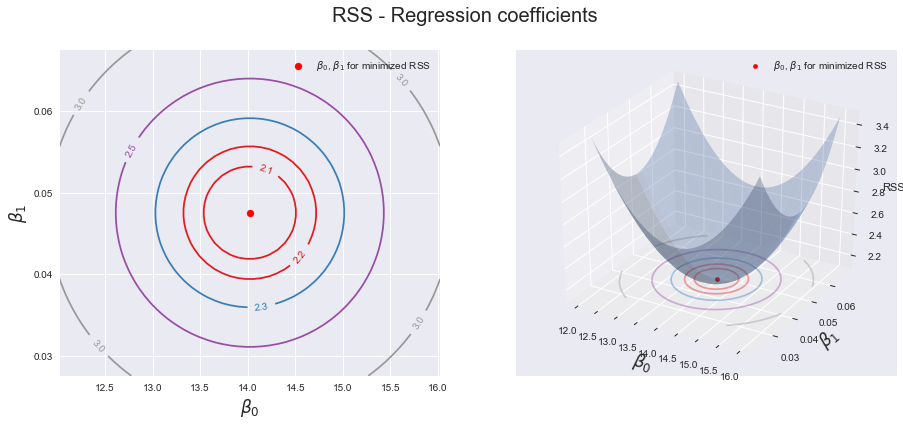

In [13]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

# get our axis to the screen
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(linearRegressionModel.intercept_, linearRegressionModel.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(linearRegressionModel.intercept_, linearRegressionModel.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

## Recall Cost Function and Gradient Descent
If you followed through my tutorial on Linear Regression from a machine learning perspective, you may remember that we went through an exercise similar to this. To give you a bit more intuition and relate some of this situation back to the machine learning walk through:

* The **RSS** can be thought of as the **Cost**
* And the way that we minimize the **RSS** under the hood is through the method of **gradient descent**!

From the above figures, it is clear that the values for $\beta_0$ and $\beta_1$ minimize the RSS/Cost!

## 1.1.2 Assessing the Accuracy of the Coefficient Estimates <a class="anchor" id="accuracy-of-coefficients"></a>
Up until this point, although we have been using slightly different methods and terminology, the steps we have been taking are very similar to the walk through I gave from a Machine Learning perspective. 

Here is where more information from a statistical perspective really begins to come into play! 

Recall that we assume the *true* relationship between $X$ and $Y$ to take the form of:
$$Y = f(X) + \epsilon$$
for some unknown function $f$, where $\epsilon$ is a mean-zero random error term. If $f$ is to be approximated by a linear function, then we can write this relationship as:
$$Y = \beta_0 + \beta_1X + \epsilon$$
Here $\beta_0$ is the intercept term—that is, the expected value of Y when X = 0, and $\beta_1$ is the slope—the average increase in Y associated with a one-unit increase in X. The error term is a catch-all for what we miss with this simple model: the true relationship is probably not linear, there may be other variables that cause variation in Y , and there may be measurement error. We typically assume that the error term is independent of X.

#### Population Regression Line
The model above defines the **population regression line**. This is the best linear approximation to the true relationship between $X$ and $Y$. The Least Squares regression coefficients (what would be found using gradient descent) characterize the **least squares line**. The image below should help make this clear:

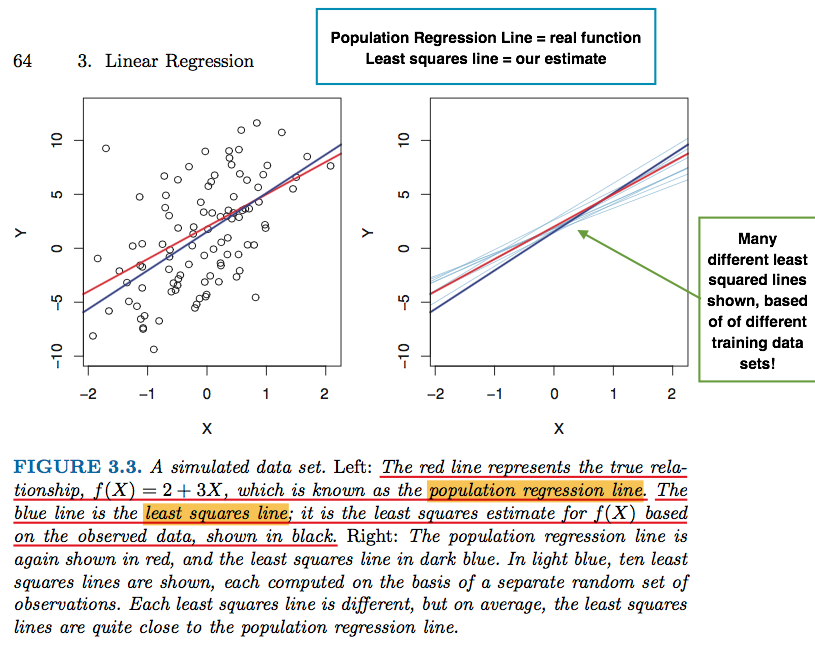

The true relationship is generally not known for real data, but the least squares line can always be computed using the coefficient estimates given in. In other words, in real applications, we have access to a set of observations from which we can compute the least squares line; however, the population regression line is unobserved.

Notice in the image above that different data sets generated from the same true model result in slightly different least squares lines, but the unobserved population regression line does not change.

At first glance, the difference between the population regression line and the least squares line may seem subtle and confusing. We only have one data set, and so what does it mean that two different lines describe the relationship between the predictor and the response? Fundamentally, the concept of these two lines is a natural extension of the standard statistical approach of using information from a sample to estimate characteristics of a
large population. An example could be the sample mean and population mean. The sample mean and the population mean are different, but in general the sample mean will provide a good estimate of the population mean.

The analogy between linear regression and estimation of the mean of a random variable is an apt one based on the concept of bias. If we use the sample mean to estimate the population mean, this estimate is unbiased, in the sense that on average, we expect the sample mean to equal the population mean. What exactly does this mean? It means that on the basis of one particular set of observations $y_1,..., y_n$, the sample mean might overestimate the population mean, and on the basis of another set of observations, the sample mean might underestimate the population mean. But if we could average a huge number of estimates of sample mean obtained from a huge number of sets of observations, then this average would exactly equal the population mean. Hence, an unbiased estimator does not systematically over- or under-estimate the true parameter. (Note for more information on this look at the Central Limit Theorem)

This holds true with the least squares coefficient estimate. If we estimate $\beta_0$ and $\beta_1$ on the basis of a particular data set, then our estimates won't be exactly equal to $\beta_0$ and $\beta_1$. **But** if we could average the estimates obtained over a huge number of data sets, then the average of these estimates would be **spot on!**

#### How accurate is this?
A natural question is as follows: how accurate is the sample mean as an estimate of population mean? We have established that the average of sample means over many data sets will be very close to the population mean, but that a single estimate of sample mean may be a substantial underestimate or overestimate of the population mean. How far off will that single estimate of sample mean be? 

In general, we answer this question by computing the **standard error** of the sample mean, written as $SE(\hat{\mu})$. We have the well-known formula:
### Standard Error: $$Var(\hat{\mu}) = SE(\hat{\mu})^2 = \frac{\sigma^2}{n}$$
where $\sigma$ is the standard deviation of each of the realization $y_i$ of $Y$.

What does this mean? **This means that the standard error tells us the average amount that this estimate, sample mean, differs from the actual value of the population mean**. Another way to think of it is that ire **measures the accuracy with which a sample represents a population. Because a sample mean will differ from a population mean, this deviation is the standard error.**

The images below make this very clear!

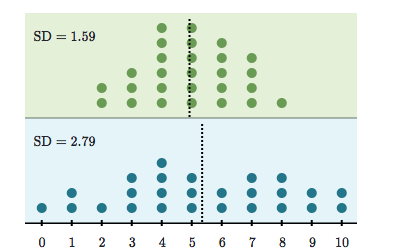
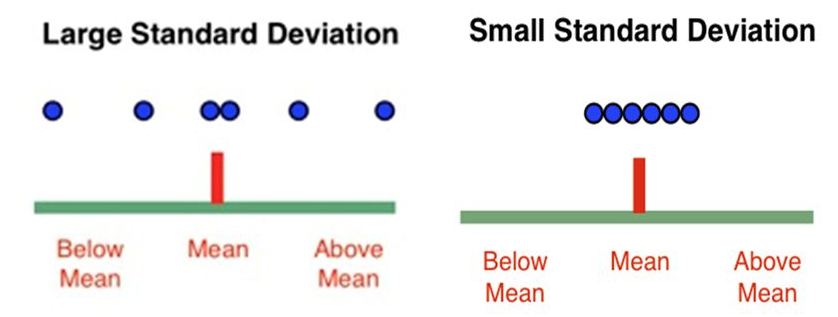

So what exactly is the difference between the standard deviation and standard error? Well, we need to define two other terms to clear this up: *statistic* and *parameter*.
* A statistic is used to describe a sample
* while a parameter is used to describe a population

With that known, the standard error uses statistics (sample data) while standard deviations use parameters (population data). The standard error tells you how far your sample statistic (like the sample mean, or in this case the values of $\beta$) deviates from the actual population mean. The larger your sample size, the smaller the SE. In other words, the larger your sample size, the closer your sample mean is to the actual population mean.


We can also see that the standard error will decrease as we gain more observations, $n$! It is inversely proportional to the samlpe size!

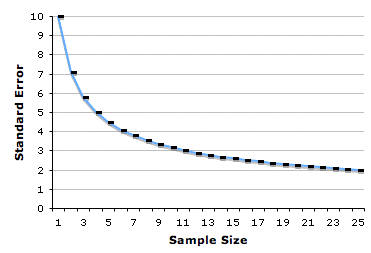

#### Intuition: What does the standard error really mean?
We can see that standard error is a function of standard deviation-and both are measures of spread (never forget that range, variance, and standard deviation are all measures of dispersion)! The standard error is essentially a standard deviation but for a *sample*, or in other words, it is the population standard deviation, with the number of samples being accounted for! The higher the number, the more spread out your data is! (the further, on average, a data point is from the mean. But keep in mind, the standard error is talking about how far your estimate of a value is from a population value-the standard deviation is talking about the spread of the values x.

We may similarly wonder the same thing when it comes to $\beta_0$ and $\beta_1$ - how close are the estimates to the true values? To determine that, we use the following formulas:

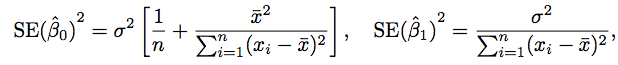

In general, $\sigma$ is not known, but can be estimated from the data. The estimate is known as:

### Residual Standard Error
$$RSE = \sqrt{\frac{RSS}{n-2}}$$

Remember, the RSS can just be thought of as the cost that our model produced. Now, what standard errors are really useful for is the computation of **confidence intervals**.

### Confidence Intervals
A 95% confidence interval is defined as a range of values such that with 95% probability, the range will contain the true unknown value of the parameter. The range is defined by its upper and lower limits, computed from the sample date.

For linear regression, a 95% confidence interval for $\beta_1$ approximately takes the form:
$$\hat{\beta_1} \pm2*SE(\hat{\beta_1})$$

What does this actually mean? That there is approximately a 95% chance that the interval:
$$[\beta_1 - 2*SE(\hat{\beta_1}), \beta_1 + 2*SE(\hat{\beta_1})]$$
Will contain the true value of $\beta_1$. The confidence interval for $\beta_0$ takes a similar form.

### Intuition: Why are confidence intervals functions of the standard error?
Well, the standard error tells us the average amount that our estimate differs from the actual population value. So if our standard error is high, it naturally makes sense that the range of our confidence interval must increase-we aren't quite as sure where the actual value falls! But, if we have a very small standard error, due to a large number of observations, it means that we are confident that our approximation is very nearly the correct measurement of the population value! 

Lets take a look at what the confidence interval's for $\beta_0$ and $\beta_1$ are for our advertising info.

In [14]:
# using the ordinary least squares method from the Statsmodels library
olsRegression = smf.ols('sales ~ TV', advertisingData).fit()

# and now grabbing the summary (intercept refers to beta_0 and TV refers to beta_1)
olsRegressionResults = olsRegression.summary()
olsRegressionResults.tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

What can we say based on this output? That there is 95% confidence that $\beta_0$ falls between [6.130, and 7.935] and that there is 95% confidence that $\beta_1$ falls between [0.042, 0.053]. 

We can conclude that in the absence of any advertising, sales will, on average, fall somewhere between 6,130 and 7,940 units. This is because that is the intercept term - ie when X (advertising) = 0. 

Additionally, for each $1000 increase in television advertising, there will be an average increase in sales of between 42 and 53 units. 

I should note, that the Statsmodel approach can also be shown to find the same value for RSS as we previously calculated:

In [15]:
# RSS with regression coefficients 
# in english: the (actual value (y) - our prediction) squared, and then all of those values summed and divided by
# the total number of training examples 
((advertisingData.sales - (olsRegression.params[0] + olsRegression.params[1]*advertisingData.TV))**2).sum()/1000

2.1025305831313514

### Hypothesis Testing
Standard errors also have another great use - to perform **hypothesis tests** on the coefficients. 

The most common hypothesis test involves the testing of the **null hypothesis**:
### <center>$H_0$ : There is no relationship between X and Y</center>
Against the **alternative hypothesis**:
### <center>$H_1$ : There is some relationship between X and Y</center>

Mathematically, this just corresponds to testing:
$$H_0:\beta_1 = 0$$
versus
$$H_a:\beta_1 \neq 0$$
This is because if $\beta_1$ = 0 then the model reduces to $Y = \beta_0 + \epsilon$, and hence $X$ is not associated with $Y$. 

So how do we test the null hypothesis? We need to determine whether $\hat{\beta_1}$, the estimate that we came up with for $\beta_1$, is sufficiently far enough away from having a value of zero, that we can *confidently* say that $\beta_1$ is non-zero. 

This depends on the **standard error of $\hat{\beta_1}$**, or in other words how accurate $\beta_1$ is! If the standard error of $\beta_1$ is small (hence it is very accurate, near the real value of $\beta_1$), then even a very small value of $\hat{\beta_1}$ may provide strong enough evidence that there is a relationship between $X$ and $Y$. 

However, if the standard error of $\hat{\beta_1}$ is large, then $\beta_1$ must be large (far from zero) in order for us to reject the null hypothesis (say that there is a relationship between X and Y).

### Key Takeaway: Hypothesis testing involves Standard Error in order to confidently say there is some relationship between X and Y

How do we do this in practice?

### t-statistic
In practice we would compute a **t-statistic**, given by the following formula:
$$t = \frac{\hat{\beta_1}-0}{SE(\hat{\beta_1})}$$

Note: this equation is generally seen as the sample/approximation of the value you are testing (in this case $\hat{\beta_1}$), minus the assumed population value for $\beta_1$-remember that is zero in this case since we are assuming the null hypothesis is true!- divided by the sample standard error (aka the sample standard deviation divided by the sample size)!

This measures the number of standard deviations that $\hat{\beta_1}$ is away from zero. If there is really no relationship between X and Y, then we expect that the equation above will have a t-distribution with n - 2 degrees of freedom (hence why we calculate the probability based on the t distribution-we are performing our hypothesis test assuming this is true).

What does that really mean? Well a t distribution has a bell shape and for values of n > 30 it is very similar to a normal distribution. But lets take a second to dig a bit further into what is actually happening.

---

## Statistics Background <a class="anchor" id="statistics-background"></a>
### What are t values?

T-tests (aka **t-statistics**) are called t-tests because the test results are all based on t-values. T-values are an example of what statisticians call test statistics. A test statistic is a standardized value that is calculated from sample data during a hypothesis test. The procedure that calculates the test statistic compares your data to what is expected under the null hypothesis.

Each type of t-test uses a specific procedure to boil all of your sample data down to one value, the t-value. **The calculations behind t-values compare your sample mean(s) to the null hypothesis and incorporates both the sample size and the variability in the data. A t-value of 0 indicates that the sample results exactly equal the null hypothesis. As the difference between the sample data and the null hypothesis increases, the absolute value of the t-value increases.**

Assume that we perform a t-test and it calculates a t-value of 2 for our sample data. What does that even mean? I might as well have told you that our data equal 2 fizbins! We don’t know if that’s common or rare when the null hypothesis is true.

By itself, a t-value of 2 doesn’t really tell us anything. T-values are not in the units of the original data, or anything else we’d be familiar with. We need a larger context in which we can place individual t-values before we can interpret them. This is where t-distributions come in.

### What are t-distributions?
When you perform a t-test for a single study, **you obtain a single t-value.** However, if we drew multiple random samples of the same size from the same population and performed the same t-test, we would obtain many t-values and we could plot a distribution of all of them. This type of distribution is known as a sampling distribution.

Fortunately, the properties of t-distributions are well understood in statistics, **so we can plot them without having to collect many samples!** A specific t-distribution is defined by its degrees of freedom (DF), a value closely related to sample size. Therefore, different t-distributions exist for every sample size, seen below:

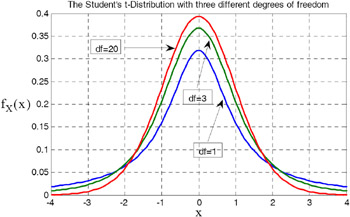

T-distributions assume that you draw repeated random samples from a population where the null hypothesis is true. You place the t-value from your study in the t-distribution to determine how consistent your results are with the null hypothesis.

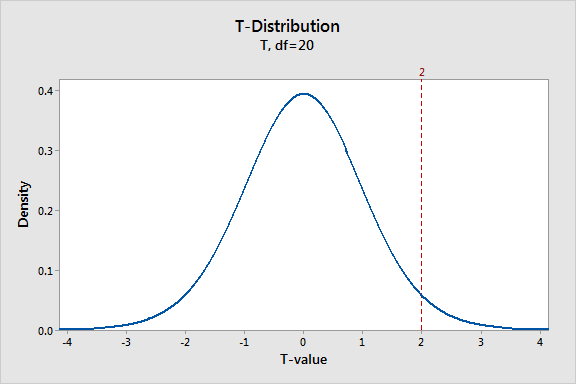

The graph above shows a t-distribution that has 20 degrees of freedom, which corresponds to a sample size of 21 in a one-sample t-test. It is a symmetric, bell-shaped distribution that is similar to the normal distribution, but with thicker tails. This graph plots the probability density function (PDF), which describes the likelihood of each t-value.

The peak of the graph is right at zero, which indicates that obtaining a sample value close to the null hypothesis is the most likely. That makes sense because t-distributions assume that the null hypothesis is true. T-values become less likely as you get further away from zero in either direction. In other words, when the null hypothesis is true, you are less likely to obtain a sample that is very different from the null hypothesis.

Our t-value of 2 indicates a positive difference between our sample data and the null hypothesis. The graph shows that there is a reasonable probability of obtaining a t-value from -2 to +2 when the null hypothesis is true. Our t-value of 2 is an unusual value, but we don’t know exactly how unusual. Our ultimate goal is to determine whether our t-value is unusual enough to warrant rejecting the null hypothesis. To do that, we'll need to calculate the probability.

Here is a useful video to solidify this concept: https://www.youtube.com/watch?v=Uv6nGIgZMVw

### Using t-Values and t-Distributions to Calculate Probabilities
The foundation behind any hypothesis test is being able to take the test statistic from a specific sample and place it within the context of a known probability distribution. For t-tests, if you take a t-value and place it in the context of the correct t-distribution, you can calculate the probabilities associated with that t-value.

A probability allows us to determine how common or rare our t-value is under the assumption that the null hypothesis is true. If the probability is low enough, we can conclude that the effect observed in our sample is inconsistent with the null hypothesis. The evidence in the sample data is strong enough to reject the null hypothesis for the entire population.

Before we calculate the probability associated with our t-value of 2, there are two important details to address.

First, we’ll actually use the t-values of +2 and -2 because we’ll perform a two-tailed test. A two-tailed test is one that can test for differences in both directions. For example, a two-tailed 2-sample t-test can determine whether the difference between group 1 and group 2 is statistically significant in either the positive or negative direction. A one-tailed test can only assess one of those directions.

Second, we can only calculate a non-zero probability for a range of t-values. As you’ll see in the graph below, a range of t-values corresponds to a proportion of the total area under the distribution curve, which is the probability. The probability for any specific point value is zero because it does not produce an area under the curve.

With these points in mind, we’ll shade the area of the curve that has t-values greater than 2 and t-values less than -2.

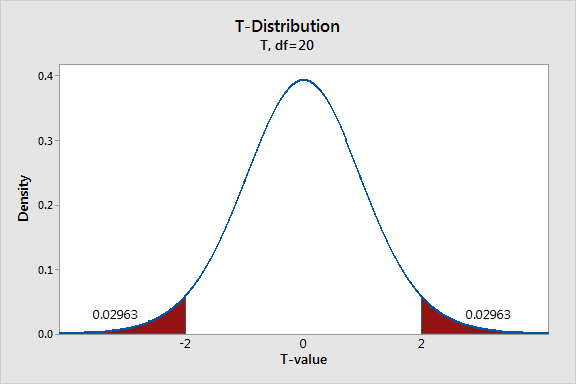

The graph displays the probability for observing a difference from the null hypothesis that is at least as extreme as the difference present in our sample data while assuming that the null hypothesis is actually true. Each of the shaded regions has a probability of 0.02963, which sums to a total probability of 0.05926. When the null hypothesis is true, the t-value falls within these regions nearly 6% of the time.

This probability has a name that you might have heard of—it’s called the **p-value**!  While the probability of our t-value falling within these regions is fairly low, it’s not low enough to reject the null hypothesis using the common significance level of 0.05.

### t-Distributions and Sample Size
As mentioned above, t-distributions are defined by the DF, which are closely associated with sample size. As the DF increases, the probability density in the tails decreases and the distribution becomes more tightly clustered around the central value. The graph below depicts t-distributions with 5 and 30 degrees of freedom.

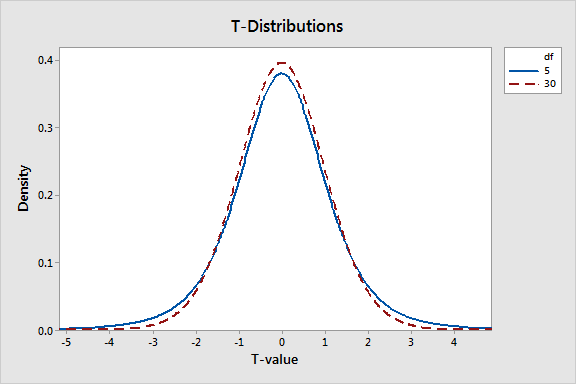

The t-distribution with fewer degrees of freedom has thicker tails. This occurs because the t-distribution is designed to reflect the added uncertainty associated with analyzing small samples. In other words, if you have a small sample, the probability that the sample statistic will be further away from the null hypothesis is greater even when the null hypothesis is true.

Small samples are more likely to be unusual. This affects the probability associated with any given t-value. For 5 and 30 degrees of freedom, a t-value of 2 in a two-tailed test has p-values of 10.2% and 5.4%, respectively. Large samples are better!

### How to Correctly Interpret P Values
You use the **P value ** to determine statistical significane in a hypothesis test. 

### What is the Null Hypothesis in Hypothesis Testing?
In order to understand P values, you must first understand the null hypothesis.

In every experiment, there is an effect or difference between groups that the researchers are testing. It could be the effectiveness of a new drug, building material, or other intervention that has benefits. Unfortunately for the researchers, there is always the possibility that there is no effect, that is, that there is no difference between the groups. This lack of a difference is called the null hypothesis, which is essentially the position a devil’s advocate would take when evaluating the results of an experiment.

To see why, let’s imagine an experiment for a drug that we know is totally ineffective. The null hypothesis is true: there is no difference between the experimental groups at the population level.

Despite the null being true, it’s entirely possible that there will be an effect in the sample data due to random sampling error. In fact, it is extremely unlikely that the sample groups will ever exactly equal the null hypothesis value. Consequently, the devil’s advocate position is that the observed difference in the sample does not reflect a true difference between populations.

### What Are P Values?
P values evaluate how well the sample data support the devil’s advocate argument that the null hypothesis is true. It measures how compatible your data are with the null hypothesis. How likely is the effect observed in your sample data if the null hypothesis is true?
* High P values: your data are likely with a true null.
* Low P values: your data are unlikely with a true null.
A low P value suggests that your sample provides enough evidence that you can reject the null hypothesis for the entire population.

### How Do You Interpret P Values? 
In technical terms, a P value is the probability of obtaining an effect at least as extreme as the one in your sample data, assuming the truth of the null hypothesis.

For example, suppose that a vaccine study produced a P value of 0.04. This P value indicates that if the vaccine had no effect, you’d obtain the observed difference or more in 4% of studies due to random sampling error.

P values address only one question: how likely are your data, assuming a true null hypothesis? It does not measure support for the alternative hypothesis. This limitation leads us into the next section to cover a very common misinterpretation of P values.

### P Values Are NOT the Probability of Making a Mistake
Incorrect interpretations of P values are very common. The most common mistake is to interpret a P value as the probability of making a mistake by rejecting a true null hypothesis (a Type I error).

There are several reasons why P values can’t be the error rate.

First, P values are calculated based on the assumptions that the null is true for the population and that the difference in the sample is caused entirely by random chance. Consequently, P values can’t tell you the probability that the null is true or false because it is 100% true from the perspective of the calculations.

Second, while a low P value indicates that your data are unlikely assuming a true null, it can’t evaluate which of two competing cases is more likely:

The null is true but your sample was unusual.
The null is false.
Determining which case is more likely requires subject area knowledge and replicate studies.

Let’s go back to the vaccine study and compare the correct and incorrect way to interpret the P value of 0.04:

Correct: Assuming that the vaccine had no effect, you’d obtain the observed difference or more in 4% of studies due to random sampling error.
 
Incorrect: If you reject the null hypothesis, there’s a 4% chance that you’re making a mistake.

### What Is the True Error Rate?
Think that this interpretation difference is simply a matter of semantics, and only important to picky statisticians? Think again. It’s important to you.

If a P value is not the error rate, what the heck is the error rate? (Can you guess which way this is heading now?)

Sellke has estimated the error rates associated with different P values. While the precise error rate depends on various assumptions, the table summarizes them for middle-of-the-road assumptions.

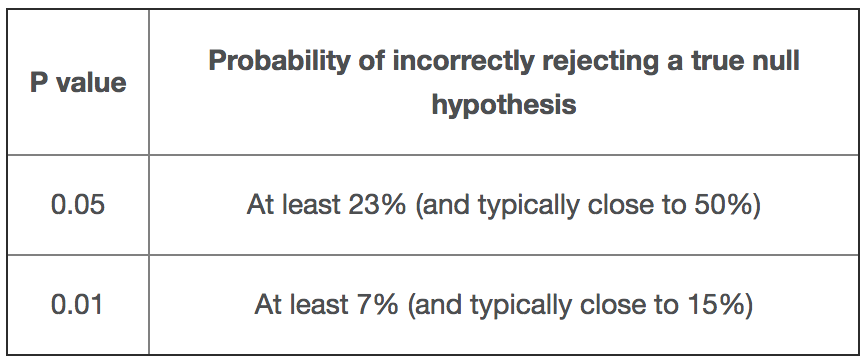

Do the higher error rates in this table surprise you? Unfortunately, the common misinterpretation of P values as the error rate creates the illusion of substantially more evidence against the null hypothesis than is justified. As you can see, if you base a decision on a single study with a P value near 0.05, the difference observed in the sample may not exist at the population level. That can be costly!

You can continue to read more about hypothesis tests and significance levels here:http://blog.minitab.com/blog/adventures-in-statistics-2/understanding-hypothesis-tests:-significance-levels-alpha-and-p-values-in-statistics

---

### Back to the t statistic and our problem at hand
Recap: 
* we compute the t statistic - remember this is just one number
* we know the t distribution based on the degrees of freedom (n-2). T distributions are probability distributions.
* we then plot that t distribution and see where our sample t value that we calculated falls
* We then just need to see where our value of t falls on the probability distribution
* It means all we need to do is compute the probability of observing any value equal to $|t|$ or larger, while assuming the null hypothesis $\beta_1 = 0$ is true.

Roughly speaking, in our case, we interpret the p-value as follows:
A small p-value indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance, in the absence of any real association between the predictor and the response. Hence, **if we see a small p-value, then we can infer that there is an association between the predictor and the response**. We reject the null hypothesis—that is, we declare a relationship to exist between X and Y —if the p-value is small enough. 

As an example, Typical p-value cutoffs for rejecting the null hypothesis are 5 or 1 %. When n = 30, these correspond to t-statistics (3.14) of around 2 and 2.75, respectively.

### Putting it all together for our advertising data
Lets take a quick look at our Ordinary Least Squares Regression results as a quick refresher.

In [16]:
olsRegressionResults.tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

* Take notice that the coefficients of $\beta_0$ and $\beta_1$ are very large relative to their standard errors.
* This means the t-statistics, which are based off of the standard errors, are also large
* The probabilities of seeing such values if the null hypothesis $H_0$ is true are virtually zero, as seen by the p-vale of 0.000
* **Hence, we can conclude that $\beta_0 \neq 0$ and $\beta_1 \neq 0$!**

## 1.1.3 Assessing the Accuracy of the Model<a class="anchor" id="accuracy-of-model"></a>
Lets take a second to gather ourselves and address where we are currently at:
* **we have used OLS (ordinary least squares) to choose a set of parameters $\beta_0$ and $\beta_1$** that minimize the RSS (residual standard error - think grey bars from image earlier in walk through)
* Under the hood it is good to remember that ordinary least squares is based on gradient descent, an optimization algorithm that tries to find the parameters that yield the lowest cost (RSS) for a system 
* Once our parameters have been determined we went about trying to assess their accuracy, compared to the true values of $\beta_0$ and $\beta_1$
* To do this we looked at:
    * **standard error** and compared it to the values we generated for our parameters
    * computed a confidence interval that had a 95% chance of holding the true $\beta$ values
    * a null hypothesis test, utilzing the t statistic, where we found that the probablity of seeing such values if there was no relationship between X and Y is virtually 0
* But what does this mean in terms of **our problem**, in **english**?
    * This is saying that in the case of TV advertising budget as our $X$ input, that there is a relationship to the $Y$ output, Sales. 
    * If the null hypothesis had been accepted, it would have said that change the TV advertising budget had no effect and the output Sales!
    * That is why we started by performing the null hypothesis test. If it had been proven correct and accepted, there would be no reason to continue on, because TV advertising would have no effect on Sales- and our goal is to increase sales!
    
### Okay, time for next steps
So we have now rejected the null hypothesis in favor of the alternative hypothesis. At this point, all that really means is that we have determined that there *is* a relationship between $X$ and $Y$. 

However, we have not yet determined how well **our model** actually fits the data!

That is our next step. The quality of a linear regression fit is generally assessed using two related quantities: the **residual standard error (RSE)** and the **$R^2$** statistics. 

### Residual Standard Error
Remember that if the true $f$ is to be approximated by a linear function, then we can write this relationship as:
$$Y = \beta_0 +\beta_1X +\epsilon$$

Well, we can clearly see that each observation has a bit of error associated with it. This error is most likely present because the observed data isn't truly linear. Because of this error, even if we knew the true regression line (as in we knew $\beta_0$ and $\beta_1$, we wouldn't be able to perfectly predict $Y$ based on $X$.

The **RSE** is an estimate of the standard deviation of $\epsilon$. It basically represents:
#### The average amount the response will deviate from the true regression line
It is computed by: 
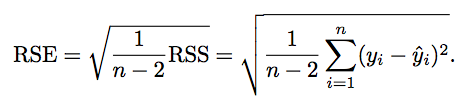
Where RSS (think cost!!!) is:
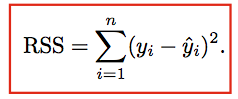

**Important Note**: In the equations above, $y_i$ represents the observed values, and $\hat{y_i}$ represents the true values of a linear model - *not the ones that we generate*! Keep in mind that we are basically taking the cost (total error, RSS, across the entire data set, ie observed - predictions) and then dividing by the number of data points, and taking the square root. This gives the average amount that each observation will differ from true regression line (remember, they differ because of the $\epsilon$ term!). 

Lets take quick look at the RSE for our TV advertising data.

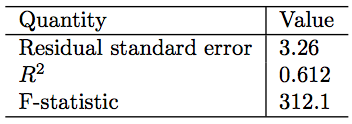

We can see from the table above that the RSE is 3.26. This means that actual sales in each market deviate from the true regression line by approximately 3,260 units - on average. 

But what does this really mean? Another way to think about this is that even the model were 100% correct- ie the true values of the unknown coefficients $\beta_0$ and $\beta_1$ were known exactly, any prediction of sales on the basis of TV advertising would still be off by about 3,260 units on average. This is due to the initial error term we saw in the equation above! Remember, that initial error term is most likely present because the true nature of the data is not linear! 

Is it acceptable to be off by 3,260 units on average? In our data set, the mean value of sales over all markets is ~14,000 units, so the percentage of error is $\frac{3,260}{14,000} = 23$%

The **RSE** can be thought of as a measure of the lack of fit the **perfect model** (not our generated estimate)  has to the data. If the predictions obtained using the **true model** are very close the **actual outcome values**- ie if $\hat{y_i} \approx y_i$, for i = 1...n - then the RSE will be **small**, and we can conclude that the model (in this case the linear model) fits our data very well!

On the other hand, if $\hat{y_i}$ is very far from $y_i$ for one or more observations, then the RSE may be quite large, and we can conclude that the model doesn't fit the data very well. 

#### Takeaway: the RSE can be used to figure out how well the ideal model (not the one we generate!!!) would fit the data 

$R^2$ Statistic
We just looked at how the RSE provides an absolute measure of lack of fit of the model (in the case above, a linear model) to the data. But this is measured in units of Y (above it was measured in units of sales). This makes it hard to determine what constitutes a good RSE. 

The **$R^2$** statistic provides an alternative measure of fit! It takes the form of a proportion - **the proportion of variance explained**- and so it always takes on a value between 0 and 1, and is indepent of the scale of Y. 

In order to calculate $R^2$, we will use the formula:
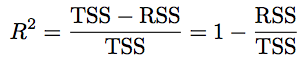
Here **TSS** represents the *total sum of squares*, and is equal to: 
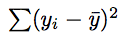 
While **RSS** was defined above, and seen again here:
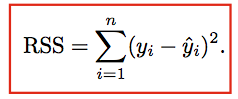
What do they each really mean though? Well the TSS is the sum of every observation (actual y, not a model prediction) minus the mean of all observations, squared. In other words, find out how far away each observation point is from the mean, square that difference value, and then sum all of the squared difference values. What does that sound like the formula for? **VARIANCE!** The TSS represents the total variance that the response Y has (remember, this actually has nothing to do with our model, prediction, etc). It can be thought of as the amount of variability inherent in the response **before** the regression is performed, in other words the **total variation**! 

What does this variability actually mean though? Think for a second, if you have 10 data points for sales, and the mean of those data points is 5, then all of those data points should equal 5, **unless** *something* (an input) is causing them to vary. What is causing them to vary? Well that is what we are trying to explain. The TSS tell us the total variance that is inherent in the data (how much it will vary from the mean).

The RSS on the other hand is the variability left after we perform our regression and make our prediction with the generated model. Essentially, there will most likely be some error (variability) between our predictions and the observed values), why is that? Well that is what is left unexplained!! We don't fully know. It could be that the model is wrong (not a truly linear relationship), or perhaps that some input was unnaccounted for!

One thing that the book leaves out is the formula for **explained variation:**
$$\sum(\hat{y}-\bar{y})^2$$

As it's name suggests, the explained variation can be **explained by the relationship between X and Y**. 

And $R^2$ can be found by calculating the (explained variation/total variation). Note that if they are the same, ie explained variation = total variation, because our model accounted for all of the variation seen in Y, then R^2 is 1!

* Now relate that back to the total variation formula and here is the thought process to follow:
    * You start with the TSS (total variation). It just says how far the observations differ from the mean of the observations. 
    * This is referred to as variation because **something** is causing the observations to vary from there mean. 
    * We want to try and **explain** what is causing that to happen
    * We do that by using the equation for **explained variation**
    * This formula is nearly identical to that of TSS, except that it uses our **prediction** of y, instead of the actual observation
    * Hence, if we find the **same** value for total variation and for explained variation, it means that our model predicitons matched the observations perfectly and completely showed us why the observations were varying from their mean.
    * The **unexplained variation**, RSS (which represents the cost, or error between the observation and our predictions), tells us how much variation or error there was after we have fit our model. 
    * It basically says "hey, we did our best to predict the observations perfectly, but we couldn't get them totally right, there must be something that we didn't account for" 
    * That thing not accounted for is the unexplained variation. 
    * The unexplained variation cannot be explained by the relationship between x and y and is due to chance or other variables.

A formula worth remembering: Total variation = Explained variation + Unexplained variation

Note: As an aside, when I was going through this material, I found myself wondering why the difference is squared (in both the standard deviation and variance calculations). This is a useful way to look at it:

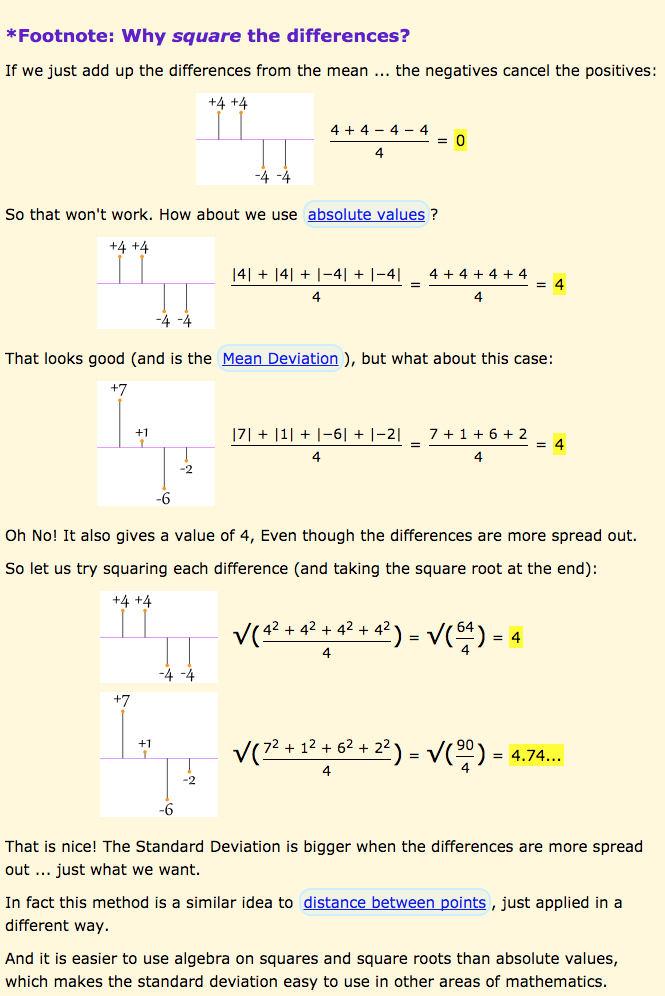

With that said, RSS is the sum of all observations minus the prediction, squared, and then all of those values are summed up. It can be thought of as the amount of variability (error) that is left unexplained after the regression is performed. 

You can see then, that $TSS - RSS$ (in other words, total variation - unexplained variation) measures the amount of variability in the response that is explained (removed) by performing the regression! And $R^2$ measures the proportion of variability in Y that can be explained using X! Hence, if R=100%, that means that all of the variability in Y can be explained based on its input X!

A good way to think about the R^2 is to perform a simple thought experiment. If we find that our model produces an RSS (cost) of 0, that means it perfectly fit the observed data. That means the formula reduces down to (explained variation, in this case its equal to totalvariation because our model explained all of it!)/total variation. Or (TSS - 0)/TSS = 1. A value of 1 means we perfectly explained all of the variance! In other words, all of the movement that occurs in Y that is not along the mean, we now know exactly what was causing it. If we hadn't explained it all, we would have said that there was something that X did not account for that caused Y to stray in unexpected ways (that don't match our prediction).

####  An R2 statistic that is close to 1 indicates that a large proportion of the variability in the response has been explained by the regression. A number near 0 indicates that the regression did not explain much of the variability in the response; this might occur because the linear model is wrong, or the inherent error $\sigma$ is high, or both.

With that said, at this point of following the book the $R^2$ value was still a bit fuzzy for me, so I decided to dive a bit deeper.

---

$R^2$ Explained
### What is Goodness-of-Fit for a Linear Model 
Linear regression calculates an equation that minimizes the distance between the fitted line and all of the data points. Technically, ordinary least squares (OLS) regression minimizes the sum of the squared residuals.

In general, a model fits the data well if the differences between the observed values and the model's predicted values are small and unbiased.

Before you look at the statistical measures for goodness-of-fit, you should check the residual plots. Residual plots can reveal unwanted residual patterns that indicate biased results more effectively than numbers. When your residual plots pass muster, you can trust your numerical results and check the goodness-of-fit statistics.

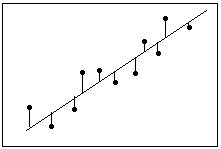

### What is $R^2$?
R-squared is **a statistical measure of how close the data are to the fitted regression line**. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

* **0% indicates that the model explains none of the variability of the response data around its mean.**
* **100% indicates that the model explains all the variability of the response data around its mean.**
In general, the higher the R-squared, the better the model fits your data. However, there are important conditions for this guideline.

### Graphical Representation of R-squared
Plotting fitted (prediction) values by observed values graphically illustrates different R-squared values for regression models.

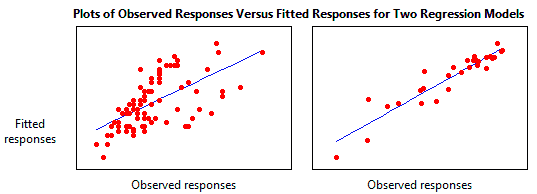

The regression model on the left accounts for 38.0% of the variance while the one on the right accounts for 87.4%. The more variance that is accounted for by the regression model the closer the data points will fall to the fitted regression line. Theoretically, if a model could explain 100% of the variance, the fitted values would always equal the observed values and, therefore, all the data points would fall on the fitted regression line.

---

As a quick aside lets take a quick look in the code below to show what an R^2 value of 1 would look like. 

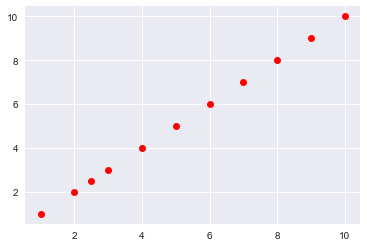

In [17]:
# observed values (just test data)
observed = np.array([1,2,3,4,2.5,10,5,9,7,6,8])

# predicted values (again, just test data)
predictions = np.array([1,2,3,4,2.5,10,5,9,7,6,8])

plt.plot(observed, predictions, 'ro')
plt.show()

We can see above that for every observed y value, our prediction was a perfect match! That is why the plot ends up as a perfectly straight line. 
* So remember, the intuition behind $R^2$ is that the observations for Y vary. 
* How much do they vary? That is the **total variance**. 
* How much of that can our model explain (as in, why are the observations in Y varying?)? That is the **explained variance**. 
* If our model is able to perfectly predict the correct y that is equal to each observation, it means we were able to explain why our Y observations were varying from the mean, and we did this by using X (and generating a correct model)
* If our model is not able to perfectly predict the correct y, that means that it is varying based on something we don't understand, or can't explain, aka the **unexplained variance**. 
* This can be thought of as the RSS or the cost, the total squared error between the observed values in Y and the predictions. 
* We aren't completely sure where that error/variation is coming from. Thats why it is unexplained. It can be thought of as limitations of our model (ie the true relationship is not linear), or perhaps the inherent error is high. 

With that said, lets take a quick look at $R^2$ value for the TV advertising data and intepret what it means quickly. 

In [18]:
linearRegressionModel = skl_lm.LinearRegression()

X = advertisingData.TV.values.reshape(-1,1)
y = advertisingData.sales

linearRegressionModel.fit(X,y)
print('intercept, beta_0', linearRegressionModel.intercept_)
print('slope, beta_1', linearRegressionModel.coef_)

intercept, beta_0 7.03259354913
slope, beta_1 [ 0.04753664]


In [19]:
sales_prediction = linearRegressionModel.predict(X)
r2_score(y, sales_prediction)

0.61187505085007099

Our $R^2$ value turns out to be 0.61, meaning that just under two-thirds of the variability in the Y response (sales) is explained by our linear regression on TV (x input).

We can see that the The $R^2$ statistic has an interpretational advantage over the RSE, since unlike the RSE, it always lies between 0 and 1. However, it can still be challenging to determine what is a good $R^2$ value, and in general, this will depend on the application.

For instance, in certain problems in physics, we may know that the data truly comes from a linear model with a small residual error. In this case, we would expect to see an $R^2$ value that is extremely close to 1, and a substantially smaller $R^2$ value might indicate a serious problem with the experiment in which the data were generated. On the other hand, in typical applications in biology, psychology, marketing, and other domains, the linear model is at best an extremely rough approximation to the data, and residual errors due to other unmeasured factors are often very large. In this setting, we would expect only a very small proportion of the variance in the response to be explained by the predictor, and an R2 value well below 0.1 might be more realistic!

The R2 statistic is a measure of the linear relationship between X and Y. Remember that **correlation** is also a measure of the linear relationship between X and Y. 

However, what happens when we use multiple predictors (multiple features) at the same time to predict the response? 

The concept of correlation between the predictors and the response does not extend automatically to this setting, since correlation quantifies the association between a single pair of variables rather than between a larger number of variables. We will see that R2 fills this role!

# 1.2 Multiple Linear Regression<a class="anchor" id="multiple-linear-regression"></a>
Simple linear regression is a useful approach for predicting a response with a single predictor, however, in practice we often have more than one! 

For example, in the Advertising data, we have examined the relationship between sales and TV advertising. We also have data for the amount of money spent advertising on the radio and in newspapers, and we may want to know whether either of these two media is associated with sales. How can we extend our analysis data in order to accommodate these two additional predictors? 

On one hand, we could run three separate simple linear regressions, each usings a different advertising medium (radio, tv, newspaper) as a different predictor. This tends to be very unsatisfactory. First of all, it is unclear how to make a **single prediciton** of sales given levels of the three advertising media budgets, since each of the budgets is associated with a separate regression equation. Second, each of the three regression equations ignores the other two media in forming estimates for the regression coefficients! We will see shortly that if the media budgets are correlated with each other in the 200 markets that constitute our data set, then this can lead to very misleading estimates of the individual media effects on sales.

For reference, lets take a quick look at the OLS coefficients for radio and newspaper. We find that a \$1,000 increase in spending on radio advertising is associated with an increase in sales by around 203 units. Table 3.3 (bottom table) contains the least squares coefficients for a simple linear regression of sales onto newspaper advertising budget. A \$1,000 increase in newspaper advertising budget is associated with an increase in sales by approximately 55 units.

In [20]:
radioOlsRegressionResults = smf.ols('sales ~ radio', advertisingData).fit()
radioOlsRegressionResults.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [21]:
newspaperOlsRegressionResults = smf.ols('sales ~ newspaper', advertisingData).fit()
newspaperOlsRegressionResults.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

Instead of fitting a separate simple linear regression model for each pre- dictor, a better approach is to extend the simple linear regression model so that it can directly accommodate multiple predictors. We can do this by giving each predictor a separate slope coefficient in a single model.

In general, if we have p distinct predictors then the multiple linear regression model takes the form:

$$Y = \beta_0 +\beta_1X_1 +\beta_2X_2+...++\beta_pX_p+\epsilon$$

where $X_j$ represents the $j^{th}$ predictor and $\beta_j$ quantifies the association between that variable and the response. **We interpret $\beta_j$ as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed.**

In our advertising example this becomes:
$$sales = \beta_0 +\beta_1*TV +\beta_2*radio+\beta_3*newspaper+\epsilon$$ 

## 1.2.1 Estimating the Regression Coefficients  <a class="anchor" id="multiple-regression-coefficients"></a>

Just like we saw in the simple linear regression setting, the regression coefficients ($\beta_0,\beta_1,...,\beta_p$) are unknown and our job is to estimate them. 

#### Intuition: the estimating of the coefficients is where we actually fit/help our model learn. 

Given estimates $\hat{\beta_0},\hat{\beta_1},...,\hat{\beta_p}$, can make predicitons using the formula:
$$\hat{y} = \hat{\beta_0} +\hat{\beta_1}x_1+\hat{\beta_2}x_2+...+\hat{\beta_p}x_p$$

Again, the parameters are estimated using the least squares approach that we saw in simple linear regression. We choose our parameters to minimize the sum of the squared residuals, or RSS, again seen below. 

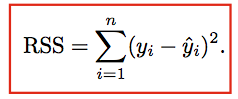

Remember, in this text book they don't go into how the minimum values are found, but we know that it is using gradient descent! And that the RSS can be thought of as the cost function!

The values of $\hat{\beta_0},\hat{\beta_1},...,\hat{\beta_p}$ that minimize the RSS are the multiple least squares regression coefficients. And example of the least squares fit to a toy data set with p = 2 predictors can be seen below.

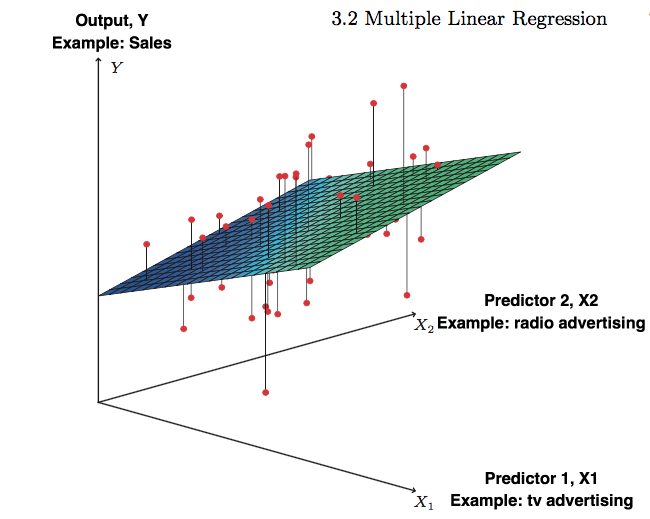

The table below shows the multiple regression coefficients when TV, radio, and newspaper advertising budgets are used to predict product sales using the Advertising data. We interpret these results as follows: for a given amount of TV and newspaper advertising, spending an additional \$1,000 on radio advertising leads to an increase in sales by approximately 189 units. Comparing these coefficient estimates to those displayed in Tables previously made for TV, radio, and newspaper OLS simple linear regression, we notice that the multiple regression coefficient estimates for TV and radio are pretty similar to the simple linear regression coefficient estimates. 

However, while the newspaper regression coefficient estimate in Table 3.3 was significantly non-zero, the coefficient estimate for newspaper in the multiple regression model is close to zero, and the **corresponding p-value is no longer significant**, with a value around 0.86. 

This illustrates that the simple and multiple regression coefficients can be quite different. This difference stems from the fact that in the simple regression case, the slope term represents the average effect of a \$1,000 increase in newspaper advertising, ignoring other predictors such as TV and radio. In contrast, **in the multiple regression setting, the coefficient for newspaper represents the average effect of increasing newspaper spending by \$1,000 while holding TV and radio fixed.**

In [22]:
multLinearRegressionResults = smf.ols('sales ~ TV + radio + newspaper', advertisingData).fit()
multLinearRegressionResults.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

Does it make sense for the multiple regression to suggest no relationship between sales and newspaper while the simple linear regression implies the opposite? Yes it does!

Consider the correlation matrix for the three predictor variables and response variable, displayed below. **Notice that the correlation between radio and newspaper is 0.35. This reveals a tendency to spend more on newspaper advertising in markets where more is spent on radio advertising.** 

Now suppose that the multiple regression is correct and newspaper advertising has no direct impact on sales, but radio advertising does increase sales. Then in markets where we spend more on radio our sales will tend to be higher, and as our correlation matrix shows, we also tend to spend more on newspaper advertising in those same markets. Hence, in a simple linear regression which only examines sales versus newspaper, we will observe that higher values of newspaper tend to be associated with higher values of sales, even though newspaper advertising does not actually affect sales. **So newspaper sales are a surrogate for radio advertising; newspaper gets “credit” for the effect of radio on sales.**

#### Intuition: in a simple linear regression some features can get "credit" for the response generated due to other features (ie newspaper getting credit for the effct of radio on sales). This is very important to remember- some input parameters have meaning and some may not

In [23]:
advertisingData.corr()

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

To further illustrate this slightly counterintuitive point, lets look at a slightly absurd example. Running a regression of shark attacks versus ice cream sales for data collected at a given beach community over a period of time would show a positive relationship, similar to that seen between sales and newspaper. Of course no one (yet) has suggested that ice creams should be banned at beaches to reduce shark attacks. In reality, higher temperatures cause more people to visit the beach, which in turn results in more ice cream sales and more shark attacks. A multiple regression of attacks versus ice cream sales and temperature reveals that, as intuition implies, the former predictor is no longer significant after adjusting for temperature.

## 1.2.2 Some Important Questions <a class="anchor" id="important-questions"></a>
Now, with the first run of multiple linear regression underway, lets go over a few very important questions that we are interested in answering. 

#### 1. Is at least one of the predictors $X_1,X_2,...,X_p$ useful in predicting the response?
#### 2. Do all of the predictors help to explain $Y$ or is only a subset of the predictors useful?
#### 3. How well does the model fit the data? 
#### 4. Given a set of predictor values, what response value should we predict, and how accurate is our prediction? 

---

### One: Is There a Relationship Between the Response and Predictors?

Think back to simple linear regression- how did we determine if there is a relationship between the response and the predictor? We checked to see if $\beta_1 = 0$! 

In multiple regression where we have $p$ predictors, **we need to ask whether all of the regression coefficients are zero**! (i.e. $\beta_1 = \beta_2 = ... = \beta_p = 0$).

As we did with simple linear regression, we again will use a hypothesis test to answer this question. 

So we will test the null hypothesis:
$$H_0: \beta_1 = \beta_2 = ... = \beta_p = 0$$

versus the alternative:
### <center>at least one $\beta_j$ is non-zero</center>

Recall, for simple linear regression we computed a **t-statistic** (using the standard error in order to confidently say there is some relationship between X and Y) in order to see how probable it was on the t-distribution, and the subsequent **p-value** allowed us to either accept or reject the null hypothesis. 

For multiple linear regression, we will compute this value using the **F-statistic**, 

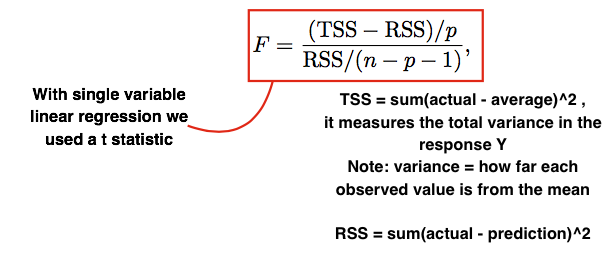

In other words, (total variance - unexplained variance) divided by the number of features, all divided by the unexplained variance divided by (number of training examples - number of features - 1).

So again, for full clarity, as with simple linear regression, **TSS (total variation)**is defined as:

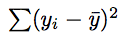

and **RSS (unexplained variation)** as:

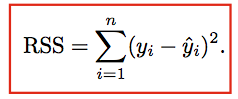

If our linear model assumptions are correct, it can be shown that 

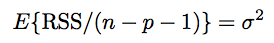

This is because in the case of having a perfect linear model, there is still irreducible error! That error, $\epsilon$, has a variance (standard deviation squared) $\sigma^2$ that occurs. So even if our model was perfect, when it made estimates on every single input X, because there is going to be espilon error associated with each prediction, RSS will not go to zero. It will take the value of the variance of the irreducible error.

It can also be shown that **if $H_0$ is true**, and the input features have effect on the response, 

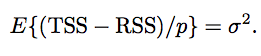

Why is this? Well, the numerator reduces down to the total variation minus the unexplained variation. If the null hypothesis is true, then the model explains very little variation, and the unexplained variation (RSS) is going to be high-nearly that of the total variation! However, TSS - RSS will not equal zero, because based on the irreducible error there will still be a difference between the two, and that is the variance of the error- as seen above!

Another way to think of this is that TSS - RSS is the explained variation. Hence, in the best case scenario where RSS is 0, and all variation is explained, the numerator will be huge! However, say we explain hardly any variation with our model and it was not better than a random guess. In that case, the total variation minus the unexplained variation will equal $\sigma^2$, which is the only variation that *is* explained (we know it comes from the irreducible error)!!!

What does this mean *intiutively*? Well, that basically says that thebottom should be taking a value close to $\sigma^2$, and that if the null hypothesis is true, the top should as well. This means that in the case of the null hypothesis being true, we would expect the F-statistic to have a value close to 1. 

On the other hand, if the alternative hypothesis is true, then 

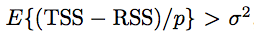

and we would expect F to be greater than one.

#### Key takeaway: if F is greater than one, alternative hypothesis is true- as in one of the input variables causes change in the output. If F is close to one, the null is most likely true. 

#### Intuition: What our equation really boils down to (not looking at the constants)  is explained variation/unexplained variation

Lets form some quick intuition about why this is the case. $TSS$ is the total variation, and $RSS$ is the unexplained variation. If the null hypothesis is true, then our model did not explain most of the variation in the response. This means that the unexplained variation, $RSS$, will be large, decreasing the value of $TSS$-$RSS$, and subsequently bring the value closer $\sigma^2$ and the overall value of F closer to 1. 

On the other hand, if the null hypothesis is not true, then a lot of the variation will be explained by the model, meaning the unexplained variation will decrease! This means that $TSS$ - $RSS$ will increase, which increases the value of the numerator (making it great than $\sigma^2$), and making the overall value of F further from 1.  

### Deep Dive in to the F-statistic
Analysis of variance (ANOVA) can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means. Let's look into how ANOVA and F-tests work using a one-way ANOVA example.

But wait a minute...why would you use an analysis of variance to determine whether means are different? Also, how do variances provide information about means?

### What are F-statistics and the F-test?
F-tests are named after its test statistic, F, which was named in honor of Sir Ronald Fisher. The F-statistic is simply a ratio of two variances. Variances are a measure of dispersion, or how far the data are scattered from the mean. Larger values represent greater dispersion.

Variance is the square of the standard deviation. For us humans, standard deviations are easier to understand than variances because they’re in the same units as the data rather than squared units. However, many analyses actually use variances in the calculations.

F-statistics are based on the ratio of mean squares. The term “mean squares” may sound confusing but it is simply an estimate of population variance that accounts for the degrees of freedom (DF) used to calculate that estimate.

Despite being a ratio of variances, you can use F-tests in a wide variety of situations. Unsurprisingly, the F-test can assess the equality of variances. However, by changing the variances that are included in the ratio, the F-test becomes a very flexible test. For example, you can use F-statistics and F-tests to test the overall significance for a regression model, to compare the fits of different models, to test specific regression terms, and to test the equality of means.

### Using the F-test in One-Way ANOVA
To use the F-test to determine whether group means are equal, it’s just a matter of including the correct variances in the ratio. In one-way ANOVA, the F-statistic is this ratio:

### <center>F = variation between sample means / variation within the samples</center>

### Numerator: Variation Between Sample Means
Lets say we are looking at the mean for four samples of plastic. The group means are: 11.203, 8.938, 10.683, and 8.838. These group means are distributed around the overall mean for all 40 observations, which is 9.915. If the group means are clustered close to the overall mean, their variance is low. However, if the group means are spread out further from the overall mean, their variance is higher.

Clearly, if we want to show that the group means are different, it helps if the means are further apart from each other. In other words, we want higher variability among the means.

Imagine that we perform two different one-way ANOVAs where each analysis has four groups. The graph below shows the spread of the means. Each dot represents the mean of an entire group. The further the dots are spread out, the higher the value of the variability in the numerator of the F-statistic.

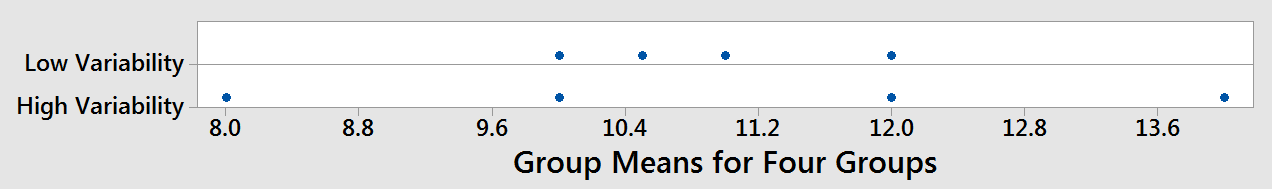

What value do we use to measure the variance between sample means for the plastic strength example? In the one-way ANOVA output, we’ll use the adjusted mean square (Adj MS) for Factor, which is 14.540. Don’t try to interpret this number because it won’t make sense. It’s the sum of the squared deviations divided by the factor DF. Just keep in mind that the further apart the group means are, the larger this number becomes.

### Denominator: Variation Within the Samples
We also need an estimate of the variability within each sample. To calculate this variance, we need to calculate how far each observation is from its group mean for all 40 observations. Technically, it is the sum of the squared deviations of each observation from its group mean divided by the error DF.

If the observations for each group are close to the group mean, the variance within the samples is low. However, if the observations for each group are further from the group mean, the variance within the samples is higher.

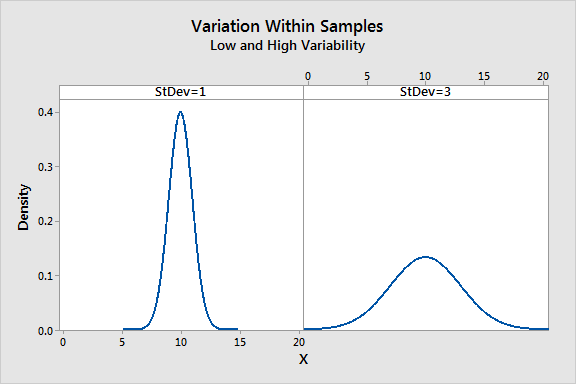

n the graph, the panel on the left shows low variation in the samples while the panel on the right shows high variation. The more spread out the observations are from their group mean, the higher the value in the denominator of the F-statistic.

If we’re hoping to show that the means are different, it's good when the within-group variance is low. You can think of the within-group variance as the background noise that can obscure a difference between means. To conclude that the group means are not equal, you want low within-group variance. Why? The within-group variance represents the variance that the model does not explain. Statisticians refer to this as random error. As the error increases, it becomes more likely that the observed differences between group means are caused by the error rather than by actual differences at the population level. Obviously, you want low amounts of error!

For this one-way ANOVA example, the value that we’ll use for the variance within samples is the Adj MS for Error, which is 4.402. It is considered “error” because it is the variability that is not explained by the factor.

### The F-Statistic: Between-groups variance / within-group variance
The F-statistic is the test statistic for F-tests. In general, an F-statistic is a ratio of two quantities that are expected to be roughly equal under the null hypothesis, which produces an F-statistic of approximately 1.

The F-statistic incorporates both measures of variability discussed above. Let's take a look at how these measures can work together to produce low and high F-values. Look at the graphs below and compare the width of the spread of the group means to the width of the spread within each group.

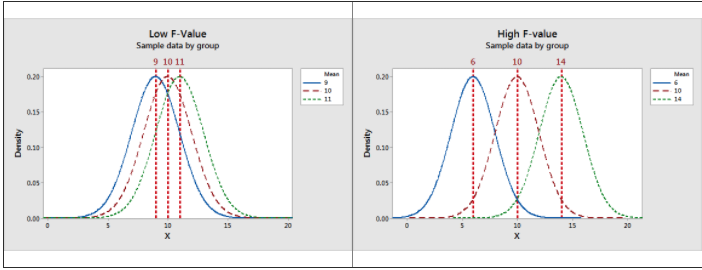

**Low F-value graph**: The group means cluster together more tightly than the within-group variability. The distance between the means is small relative to the random error within each group. You can’t conclude that these groups are truly different at the population level.
**High F-value graph**: The group means spread out more than the variability of the data within groups. In this case, it becomes more likely that the observed differences between group means reflect differences at the population level.

The low F-value graph shows a case where the group means are close together (low variability) relative to the variability within each group. The high F-value graph shows a case where the variability of group means is large relative to the within group variability. In order to reject the null hypothesis that the group means are equal, we need a high F-value.

For our plastic strength example, we'll use the Factor Adj MS for the numerator (14.540) and the Error Adj MS for the denominator (4.402), which gives us an F-value of 3.30.

Is our F-value high enough? A single F-value is hard to interpret on its own. We need to place our F-value into a larger context before we can interpret it. To do that, we’ll use the F-distribution to calculate probabilities.

### F-distributions and Hypothesis Testing
For one-way ANOVA, the ratio of the between-group variability to the within-group variability follows an F-distribution when the null hypothesis is true.

When you perform a one-way ANOVA for a single study, you obtain a single F-value. However, if we drew multiple random samples of the same size from the same population and performed the same one-way ANOVA, we would obtain many F-values and we could plot a distribution of all of them. This type of distribution is known as a sampling distribution.

Because the F-distribution assumes that the null hypothesis is true, we can place the F-value from our study in the F-distribution to determine how consistent our results are with the null hypothesis and to calculate probabilities.

The probability that we want to calculate is the probability of observing an F-statistic that is at least as high as the value that our study obtained. That probability allows us to determine how common or rare our F-value is under the assumption that the null hypothesis is true. If the probability is low enough, we can conclude that our data is inconsistent with the null hypothesis. The evidence in the sample data is strong enough to reject the null hypothesis for the entire population.

This probability that we’re calculating is also known as the p-value!

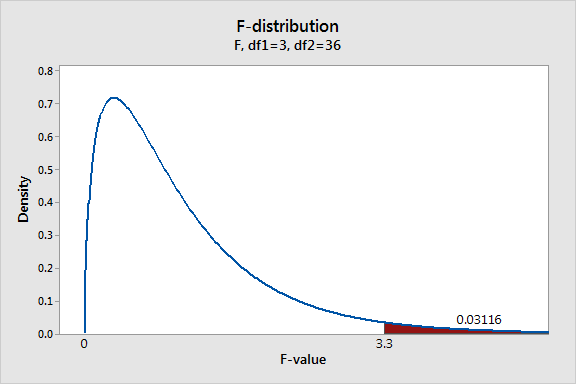

The graph displays the distribution of F-values that we'd obtain if the null hypothesis is true and we repeat our study many times. The shaded area represents the probability of observing an F-value that is at least as large as the F-value our study obtained. F-values fall within this shaded region about 3.1% of the time when the null hypothesis is true. This probability is low enough to reject the null hypothesis using the common significance level of 0.05. We can conclude that not all the group means are equal.

### Assessing Means by Analyzing Variation
ANOVA uses the F-test to determine whether the variability between group means is larger than the variability of the observations within the groups. If that ratio is sufficiently large, you can conclude that not all the means are equal.

This brings us back to why we analyze variation to make judgments about means. Think about the question: "Are the group means different?" You are implicitly asking about the variability of the means. After all, if the group means don't vary, or don't vary by more than random chance allows, then you can't say the means are different. And that's why you use analysis of variance to test the means.

If you still want to learn more about f-tests, feel free to dig into the following link: http://statisticsbyjim.com/anova/f-tests-anova/

### F-test in Regression Analysis
Now the F-tests that I just walked through above were comparing group means and trying to determine if they were statistically significant. Let's bring the discussion back to multiple regression analysis. 

In general, an F-test in regression compares the fits of different linear models. Unlike t-tests that can assess only one regression coefficient at a time, the F-test can assess multiple coefficients simultaneously.

The F-test of the overall significance is a specific form of the F-test. It compares a model with no predictors to the model that you specify. A regression model that contains no predictors is also known as an intercept-only model.

The hypotheses for the F-test of the overall significance are as follows:
* Null hypothesis: The fit of the intercept-only model and your model are equal.
* Alternative hypothesis: The fit of the intercept-only model is significantly reduced compared to your model.

So again, to wrap up here, in the f-test that I described above, we walked through trying to determine if group means were statistically significant. However, in our case of multiple linear regression, we are trying to determine if the response $Y$ is statistically different when using the parameters we found for $\beta$, when compared to setting all parameters equal to zero. 

### Back to our problem
In the case of our problem, the multiple linear regression model obtained by regressing sales onto radio, tv, and newspaper is shown below. The F statistic can be seen to be 570. 

In [24]:
multLinearRegressionResults.summary().tables[0]

<class 'statsmodels.iolib.table.SimpleTable'>

Because in this case F is far larger than 1, it provides compelling evidence against the null hypothesis. In other words, the large F-statistic suggests that at least one of the advertising media must be related to sales.

However, what if the F-statistic had been closer to 1? How large does the F-statistic need to be before we can reject H0 and conclude that there is a relationship? It turns out that the answer depends on the values of n and p. When n is large, an F-statistic that is just a little larger than 1 might still provide evidence against $H_0$. In contrast, a larger F-statistic is needed to reject $H_0$ if n is small.

When $H_0$ is true and the errors $\epsilon_i$ have a normal distribution, the F-statistic follows and F-distribution. For any given value of n and p, any statistical software package can be used to compute the p-value associated with the F-statistic using this distribution. Based on this p-value, we can determine whether or not to reject the null hypothesis.

For the advertising data, the p-value associated with the F-statistic above (Prob F-statistic: 1.58e-96) is essentially zero, so we have extremely strong evidence that at least one of the media is associated with increased sales.

It is important to note that in the F test shown above we are testing the null hypothesis that all the coefficients are zero. Sometimes, however, we only want to test that one of the coefficients are zero. The formulas can be found in the ISLR book, but the main takeaway is as follows:

Notice in the table below, for each individual predictor a t-statistic and a p-value were reported. These provide information about whether each individual predictor is related to the response, after adjusting for the other predictors. It turns out that each of these are exactly equivalent to the F-test that omits that single variable from the model, leaving all the others in. So it reports the partial effect of adding that variable to the model. For instance, as we discussed earlier, these p-values indicate that TV and radio are related to sales, but that there is no evidence that newspaper is associated with sales, in the presence of these two.

In [25]:
multLinearRegressionResults.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

Given these individual p-values for each variable, why do we need to look at the overall F-statistic? After all, it seems likely that if any one of the p-values for the individual variables is very small, then at least one of the predictors is related to the response. However, this logic is flawed, especially when the number of predictors p is large. We briefly touched on this earlier, but lets give another example.

Consider a situation where $p=100$ and $H_0: \beta_1 = \beta_2 =...=\beta_p = 0$, so no variable is actually associated with the response. In this situation, about 5% of the p-values associated with each variable (as seen above) will be below 0.05 by *chance* (think about the probability distribution). In other words, we expect to see approximately 5 *small* p-values even in the absence of an true association between the predictors and the response. In fact, because of the probability distribution that is used in this case (t distribution), we are almost **guaranteed** to observer at least one p value below 0.05 by pure chance! This means that if we use the individual t-statistics and associated p values in order to decide whether or not there is any association between the variables and the response, there is a very high chance that we will incorrectly conclude that there is a relationship. 

However, the F-statistic does **not** suffer from this problem because it adjusts for the number of predictors. Hence, if $H_0$ is true, there is only a 5% chance that the F-statistic will result in a p-value below 0.05, regardless of the number of predictors or the number of observations!

The approach of using an F-statistic to test for any association between the predictors and the response works when p is relatively small, and cer- tainly small compared to n. However, sometimes we have a very large number of variables. If p > n then there are more coefficients $\beta_j$ to estimate than observations from which to estimate them. In this case we cannot even fit the multiple linear regression model using least squares, so the F-statistic cannot be used, and neither can most of the other concepts that we have seen so far in this chapter. When p is large, some of the approaches discussed in the next section, such as forward selection, can be used.


### Two: Deciding on Important Variables?
As we just went over, the first step in a multiple linear regression analysis is to compute the F-statistic and to examine the associated p-value. If we conclude on the basis of that p-value that at least one of the predictors is related to the response, then it is natural to wonder which are the guilty ones! We could look at the individual p-values shown in the table above, but as discussed, if p is large we are likely to make some false discoveries.

It is possible that all of the predictors are associated with the response, but it is more often the case that *the response is only related to a subset of the predictors*. The task of determining which predictors are associated with the response, in order to fit a single model involving only those predictors, is referred to as **variable selection**.

Ideally, we would like to perform variable selection by trying out a lot of different models, each containing a different subset of the predictors. For instance, if p = 2, then we can consider four models: (1) a model contain- ing no variables, (2) a model containing $X_1$ only, (3) a model containing $X_2$ only, and (4) a model containing both $X_1$ and $X_2$. We can then select the best model out of all of the models that we have considered. How do we determine which model is best? Various statistics can be used to judge the quality of a model, that we will discuss more in future notebooks (for reference a few are: Mallow’s Cp, Akaike information criterion (AIC), Bayesian information criterion (BIC), and adjusted R2). We can also deter- mine which model is best by plotting various model outputs, such as the residuals, in order to search for patterns.

Unfortunately, there are a total of $2^p$ models that contain subsets of p variables. This means that even for moderate p, trying out every possible subset of the predictors is infeasible. For instance, we saw that if p = 2, then there are $2^2$ = 4 models to consider. But if p = 30, then we must consider $2^30$ = 1,073,741,824 models! Clearly that is impractical. Hence, we need an automated and efficient approach to choose a smaller set of models to consider. There a three classical approaches for this:

#### 1) Forward Selection:
* We begin with the *null model* (a model that contains an intercept but no predictors). We then fit p simple linear regressions and add to the null model the variable that results in the lowest RSS. We then add to that model the variable that results in the lowest RSS for the new two-variable model. This approach is continued until some stopping rule is satisfied.

#### 2) Backward Selection:
* We start with all variables in the model, and remove the variable with the largest p-value—that is, the variable that is the least statistically significant. The new (p − 1) variable model is fit, and the variable with the largest p-value is removed. This procedure continues until a stopping rule is reached. For instance, we may stop when all remaining variables have a p-value below some threshold.

#### 3) Mixed Selection:
* This is a combination of forward and backward se- lection. We start with no variables in the model, and as with forward selection, we add the variable that provides the best fit. We con- tinue to add variables one-by-one. Of course, as we noted with the Advertising example, the p-values for variables can become larger as new predictors are added to the model. Hence, if at any point the p-value for one of the variables in the model rises above a certain threshold, then we remove that variable from the model. We con- tinue to perform these forward and backward steps until all variables in the model have a sufficiently low p-value, and all variables outside the model would have a large p-value if added to the model.

Generally, Mixed Selection is thought of as the best of these three approaches- since it takes the best components of 1 and 2!

### Three: How well does our model fit the data?
Okay so at this point we have determined that there is a relationship between the response and at least one of the predictors via and f-statistic, and the decided upon which variables are actually the important ones. 

Our next step is to figure out how well our model actually fits the data! Two of the most common numerical measures of model fit are the RSE and $R^2$, the fraction of variance explained. These quantities are computed and interpreted in the same fashion as for simple linear regression.

Recall that in simple regression, $R^2$ is the square of the correlation of the response and the variable. In multiple linear regression, it turns out that it equals $Cor(Y, \hat{Y})^2$, the square of the correlation between the response and the fitted linear model; in fact one property of the fitted linear model is that it maximizes this correlation among all possible linear models.

An $R^2$ value close to 1 explains large portion of the variance in the response variables. Lets take a look at the $R^2$ value of the model that uses all three advertising media to predict sales.

In [26]:
multLinearRegressionResults.summary().tables[0]

<class 'statsmodels.iolib.table.SimpleTable'>

We can see that the $R^2$ value here is 0.897. However, what if we only user TV and radio to predict sales (excuding newspaper)?

In [27]:
radioTVResults = smf.ols('sales ~ TV + radio', advertisingData).fit()
radioTVResults.summary().tables[0]

<class 'statsmodels.iolib.table.SimpleTable'>

We can see that the $R^2$ value is also 0.897!!! This means that adding newspaper does hardly anything to explain the variance. 

It turns out that $R^2$ will always increase when more variables are added to the model, even if those variables are only weakly associated with the response. This is due to the fact that adding another variable to the least squares equations must allow us to fit the training data (though not necessarily the testing data) more accurately.

Thus, the $R^2$ statistic, which is also computed on the training data, must increase. The fact that adding newspaper advertising to the model containing only TV and radio advertising leads to just a tiny increase in $R^2$ provides additional evidence that newspaper can be dropped from the model.

Essentially, newspaper pro- vides no real improvement in the model fit to the training samples, and its inclusion will likely lead to poor results on independent test samples due to overfitting.

In contrast, the model containing only TV as a predictor had an $R^2$ of 0.61. By adding radio, we see a significant improvement! Again, intuitively we can think that be just looking at TV, there is a still a good deal of variance in the response that we can't figure out where it is coming from! But by adding radio we can say "ahh so its the increase/decrease of radio advertisement spending that is causing this additional variation in the response, sales. 

This implies that a model that uses TV and radio expenditures to predict sales is substantially better than one that uses only TV advertis- ing. We could further quantify this improvement by looking at the p-value for the radio coefficient in a model that contains only TV and radio as predictors.

The model that contains only TV and radio as predictors has an RSE of 1.681, and the model that also contains newspaper as a predictor has an RSE of 1.686. In contrast, the model that contains only TV has an RSE of 3.26. This corroborates our previous conclusion that a model that uses TV and radio expenditures to predict sales is much more accurate (on the training data) than one that only uses TV spending. Furthermore, given that TV and radio expenditures are used as predictors, there is no point in also using newspaper spending as a predictor in the model.

It can be useful to plot the data. Graphical summaries can reveal problems with a model that are not visible from numerical statistics. For example, below we can see a three-dimensional plot of TV and radio versus sales. We see that some observations lie above and some observations lie below the least squares regression plane. In particular, the linear model seems to overestimate sales for instances in which most of the advertising money was spent exclusively on either TV or radio. It underestimates sales for instances where the budget was split between the two media. This pro- nounced non-linear pattern cannot be modeled accurately using linear regression. It suggests a synergy or interaction effect between the advertising media, whereby combining the media together results in a bigger boost to sales than using any single medium.

In [28]:
regr = skl_lm.LinearRegression()

X = advertisingData[['radio', 'TV']].as_matrix()
y = advertisingData.sales

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[ 0.18799423  0.04575482]
2.92109991241


In [29]:
# what are the min and max values of Radio and TV?
# Use these values to set up grid for plotting!
advertisingData[['radio','TV']].describe()

            radio          TV
count  200.000000  200.000000
mean    23.264000  147.042500
std     14.846809   85.854236
min      0.000000    0.700000
25%      9.975000   74.375000
50%     22.900000  149.750000
75%     36.525000  218.825000
max     49.600000  296.400000

In [30]:
# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

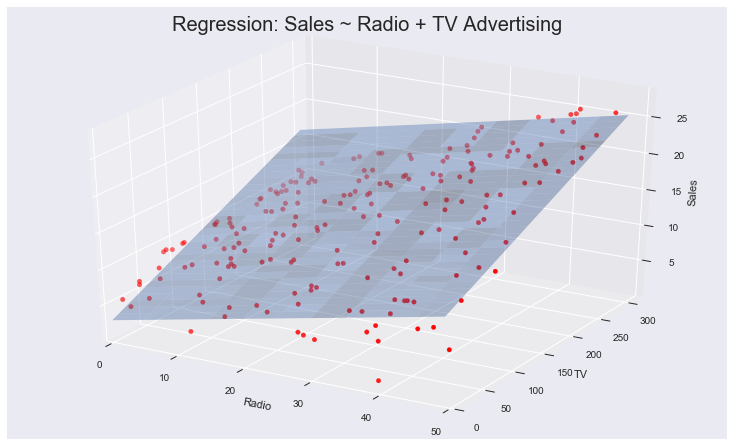

In [31]:
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertisingData.radio, advertisingData.TV, advertisingData.sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

### Four: Predictions
Okay so from the original 4 questions we set out to answer, we can gone through 3:
1. We determined that at least one of the predictors was useful in predicting the response by using an f-statistic
2. We determined which variables were actually useful in making the prediction (in this case radio and TV)
3. We figured out our how well our model fit the data by using calculating the $R^2$ value, RSE, and looking at the residual plots

With those taken care of we reach our last question: Given a set of predictor values, what response value should we predict, and how accurate is our prediction?

Once we have our multiple regression model, it is straightforward to apply:
$$Y = \beta_0 +\beta_1X_1 +\beta_2X_2+...++\beta_pX_p+\epsilon$$
in order to predict the response Y on the basis of a set of values for the predictors $X_1, X_2,...,X_p$

However, there are **three** sorts of uncertainty associated with this prediction. 

**1)** The coefficient estimates $\hat{\beta_0},\hat{\beta_1},...,\hat{\beta_p}$ are estimates for $\beta_0,\beta_1,...,\beta_p$. In other words, the **least squares plane**:
$$\hat{Y} = \hat{\beta_0}+\hat{\beta_1}X_1+...+\hat{\beta_p}X_p$$
is only an estimate for the true population regression plane:
$$f(X) = \beta_0+\beta_1X_1+...+\beta_pX_p$$

The inaccuracy in the coefficient estimates is related to the **reducible error** (think error because our estimate is not a perfect estimate of $f(X)$) that was discussed earlier. We can compute a **confidence interval** in order to determine how close $\hat{Y}$ will be to $f(X)$.

**2)** Of course, assuming a linear model for $f(X)$ is almost always an approximation of reality, so there is an additional source of potentially reducible error which we call **model bias**. This means that when we create our model there is a strong bias or idea that it is going to be linear, when in fact it may not be. So when we use a linear model, we are in fact estimating the best linear approximation to the true surface. However, here we will ignore this discrepancy, and operate as if the linear model were correct.

**3)** The last source of uncertainty comes from the following: even if we knew $f(X)$, as in we knew the true values for $\beta_0,\beta_1,...,\beta_p$, the response value cannot be perfectly predicted because of the random error $\epsilon$ in the model. We have referred to this as **irreducible error**. How much will $Y$ vary from $\hat{Y}$? We use *prediction intervals* to answer this question. Prediction intervals are always wider than confidence intervals, because they incorporate both the error in the estimate for $f(X$) (the reducible error) and the uncertainty as to how much an individual point will differ from the population regression plane (the irreducible error).


We use a confidence interval to quantify the uncertainty surrounding the average sales over a large number of cities. For example, given that \$100,000 is spent on TV advertising and \$20,000 is spent on radio advertising in each city, the 95 % confidence interval is [10,985, 11,528]. We interpret this to mean that 95 % of intervals of this form will contain the true value of $f(X)$.8 On the other hand, a prediction interval can be used to quantify the uncertainty surrounding sales for a particular city. Given that \$100,000 is spent on TV advertising and \$20,000 is spent on radio advertising in that city the 95 % prediction interval is [7,930, 14,580]. We interpret this to mean that 95 % of intervals of this form will contain the true value of $Y$ for this city. Note that both intervals are centered at 11,256, but that the prediction interval is substantially wider than the confidence interval, reflecting the increased uncertainty about sales for a given city in comparison to the average sales over many locations.

# 1.3 Other Considerations <a class="anchor" id="other-considerations"></a>

## 1.3.1 Qualitative Predictors <a class="anchor" id="qualitative-predictors"></a>
At this point in making this set of notes I began to have a much better understanding of the equations, notation, and intuitions behind regression. For that reason, for the remainder of this notebook I will stick to describing the situations in english, giving my intuitions, and leaving the actual equations in the book (which is a fantastic resource!).

With that said lets look into something that may have jumped out at you during this walk through; up until this point all of our variables have been quantitative. However, this is not always the case! Often they may be **qualitative**. 

For example, the Credit data set displayed below records balance (average credit card debt for a number of individuals) as well as several quantitative predictors: age, cards (number of credit cards), education (years of education), income (in thousands of dollars), limit (credit limit), and rating (credit rating).

In [32]:
credit = pd.read_csv('Credit.csv', usecols=list(range(1,12)))
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.head(3)

    Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   

   Ethnicity  Balance  Student2  
0  Caucasian      333         0  
1      Asian      903         1  
2      Asian      580         0  

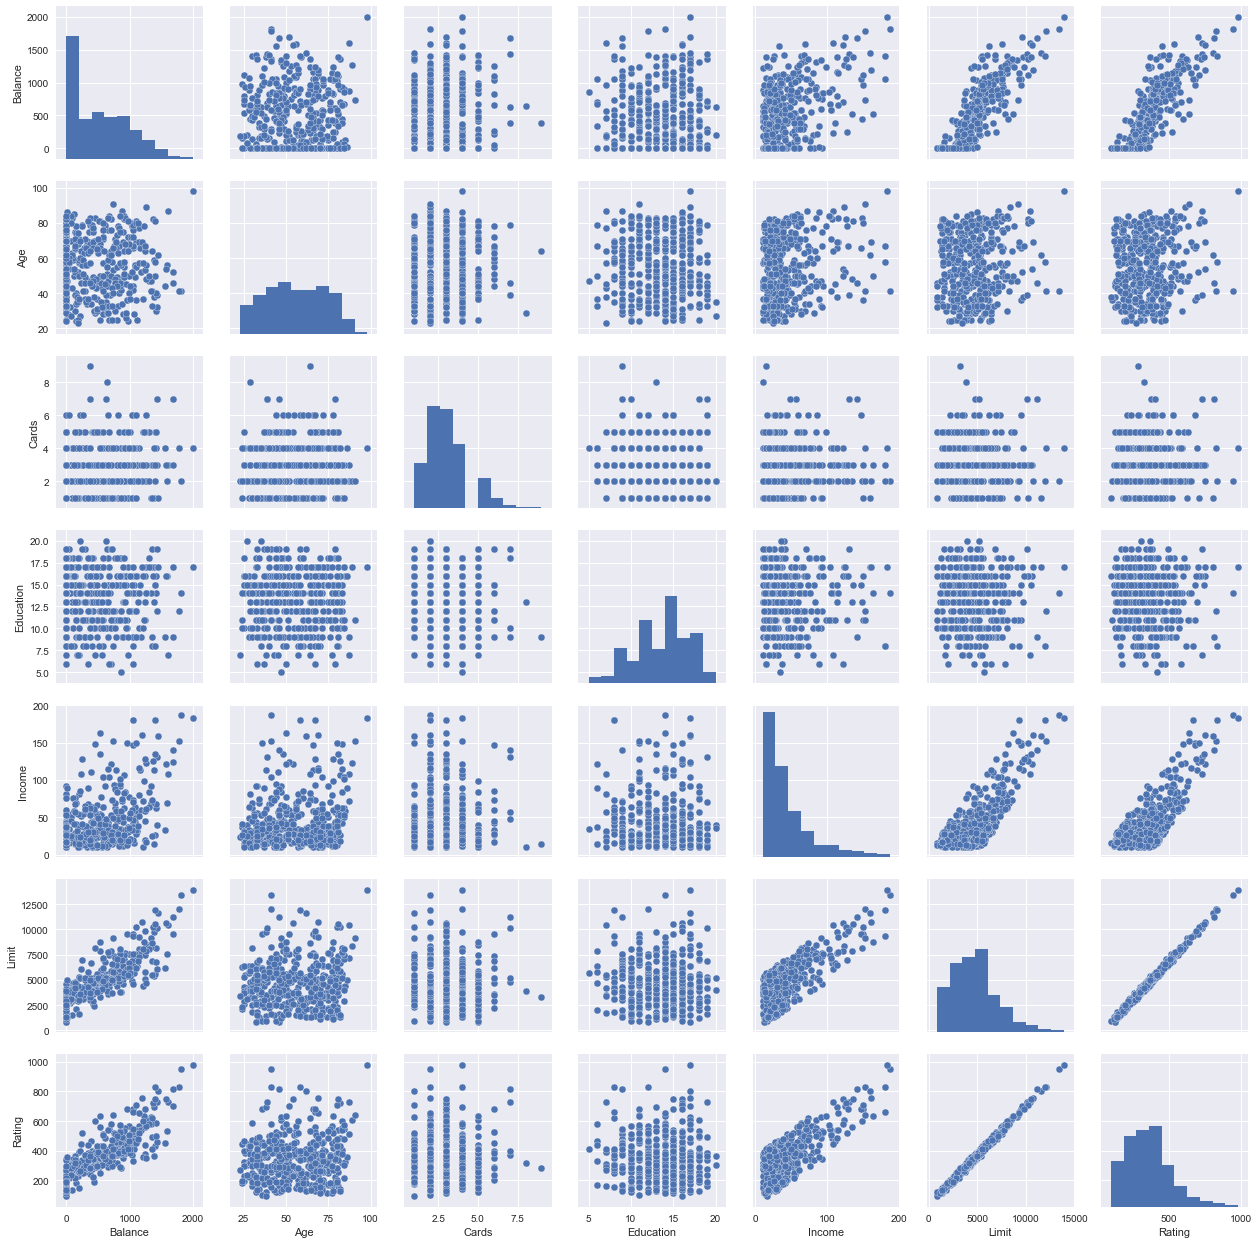

In [33]:
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']])

### Predictors with Only Two Levels
Suppose that we wish to investigate differences in credit card balance be- tween males and females, ignoring the other variables for the moment. If a qualitative predictor (also known as a factor) only has two levels, or possi- ble values, then incorporating it into a regression model is very simple. We simply create an indicator or dummy variable that takes on two possible numerical values.

In [34]:
est = smf.ols('Balance ~ Gender', credit).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

However, we notice that the p-value for the dummy variable is very high. This indicates that there is no statistical evidence of a difference in average credit card balance between the genders.

### Qualitative Predictors with More than Two Levels
When a qualitative predictor has more than two levels, a single dummy variable cannot represent all possible values. In this situation, we can create additional dummy variables.


In [35]:
est = smf.ols('Balance ~ Ethnicity', credit).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

Above, we see that the estimated balance for the baseline, African American, is \$531.00. It is estimated that the Asian category will have \$18.69 less debt than the African American category, and that the Caucasian category will have \$12.50 less debt than the African American category. However, the p-values associated with the coefficient estimates for the two dummy variables are very large, suggesting no statistical evidence of a real difference in credit card balance between the ethnicities.

Once again, the level selected as the baseline category is arbitrary, and the final predictions for each group will be the same regardless of this choice. However, the coefficients and their p-values do depend on the choice of dummy variable coding. Rather than rely on the individual coefficients, we can use an F-test to test $H_0 : \beta_1 = \beta_2 = 0$ this does not depend on the coding. This F-test has a p-value of 0.96, indicating that we cannot reject the null hypothesis that there is no relationship between balance and ethnicity

Using this dummy variable approach presents no difficulties when in- corporating both quantitative and qualitative predictors. For example, to regress balance on both a quantitative variable such as income and a qual- itative variable such as student, we must simply create a dummy variable for student and then fit a multiple regression model using income and the dummy variable as predictors for credit card balance.

## 1.3.2 Extensions of the Linear Model <a class="anchor" id="extensions"></a>
The standard linear regression model, is very interpretable and works very well on many real-world problems. However, it makes sev- eral highly restrictive assumptions that are often violated in practice. Two of the most important assumptions state that the relationship between the predictors and response are **additive** and **linear**.

#### Additive Assumption:
The effect of changes in a predictor Xj on the response Y is independent of the values of the other predictors.

#### Linear Assumption:
The change in the response Y due to a one-unit change in Xj is constant, regardless of the value of Xj.

Lets look at a few ways to extend the linear model.

## Removing the Additive Assumption
In our previous analysis of the Advertising data, we concluded that both TV and radio seem to be associated with sales. The linear models that formed the basis for this conclusion assumed that the effect on sales of increasing one advertising medium is independent of the amount spent on the other media. For example, the linear model states that the average effect on sales of a one-unit increase in TV is always β1, regardless of the amount spent on radio.

However, this simple model may be incorrect. Suppose that spending money on radio advertising actually increases the effectiveness of TV ad- vertising, so that the slope term for TV should increase as radio increases. In this situation, given a fixed budget of \$100,000, spending half on radio and half on TV may increase sales more than allocating the entire amount to either TV or to radio.

In marketing, this is known as a *synergy* effect, and in statistics it is referred to as an **interaction effect.**

If we look at the 3d plot above, notice that when levels of either TV or radio are low, then the true sales are lower than predicted by the linear model. But when advertising is split between the two media, then the model tends to underestimate sales.

One way to extend our model is to allow for interaction effects is to include a third predictor, called an interaction term, which is constructed by computing the product of X1 and X2 (see equation in book). Now, the effect of X1 on Y is no longer constant: adjusting X2 will change the impact of X1 on Y .

For example, suppose that we are interested in studying the productiv- ity of a factory. We wish to predict the number of units produced on the basis of the number of production lines and the total number of workers. It seems likely that the effect of increasing the number of production lines will depend on the number of workers, since if no workers are available to operate the lines, then increasing the number of lines will not increase production. This suggests that it would be appropriate to include an inter- action term between lines and workers in a linear model to predict units. **Hence the more workers we have, the stronger will be the effect of lines.
**


Lets get back to our advertising example take a quick look at the linear model with an interaction term between Tv and radio.

In [36]:
est = smf.ols('sales ~ TV + radio + TV*radio', advertisingData).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

The results above strongly suggest that the model that includes the interaction term is superior to the model that contains only main effects. The p-value for the interaction term, TV×radio, is extremely low, indicating that there is strong evidence for $H_a : \beta_3\neq 0$. In other words, it is clear that the true relationship is not additive. The $R^2$ for the model is 96.8 %, compared to only 89.7% for the model that predicts sales using TV and radio without an interaction term. This means that (96.8 − 89.7)/(100 − 89.7) = 69 % of the variability in sales that remains after fitting the additive model has been explained by the interaction term.

In this example, the p-values associated with TV, radio, and the interac- tion term all are statistically significant (Table 3.9), and so it is obvious that all three variables should be included in the model. However, it is sometimes the case that an interaction term has a very small p-value, but the associated main effects (in this case, TV and radio) do not. The hier- archical principle states that if we include an interaction in a model, we should also include the main effects, even if the p-values associated with their coefficients are not significant. In other words, if the interaction be- tween X1 and X2 seems important, then we should include both X1 and X2 in the model even if their coefficient estimates have large p-values. The rationale for this principle is that if X1 × X2 is related to the response, then whether or not the coefficients of X1 or X2 are exactly zero is of lit- tle interest. Also X1 × X2 is typically correlated with X1 and X2, and so leaving them out tends to alter the meaning of the interaction.

The concept of interactions applies just as well to qualitative variables, or to a combination of quantitative and qualitative variables, seen below!

Regression 1 - without interaction term
Intercept    211.142964
Income         5.984336
Student2     382.670539
dtype: float64

Regression 2 - with interaction term
Intercept          200.623153
Income               6.218169
Student2           476.675843
Income:Student2     -1.999151
dtype: float64


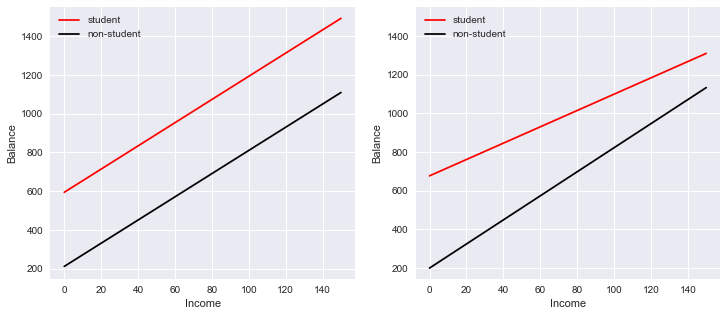

In [37]:
est1 = smf.ols('Balance ~ Income + Student2', credit).fit()
regr1 = est1.params
est2 = smf.ols('Balance ~ Income + Income*Student2', credit).fit()
regr2 = est2.params

print('Regression 1 - without interaction term')
print(regr1)
print('\nRegression 2 - with interaction term')
print(regr2)

# Income (x-axis)
income = np.linspace(0,150)

# Balance without interaction term (y-axis)
student1 = np.linspace(regr1['Intercept']+regr1['Student2'],
                       regr1['Intercept']+regr1['Student2']+150*regr1['Income'])
non_student1 =  np.linspace(regr1['Intercept'], regr1['Intercept']+150*regr1['Income'])

# Balance with iteraction term (y-axis)
student2 = np.linspace(regr2['Intercept']+regr2['Student2'],
                       regr2['Intercept']+regr2['Student2']+
                       150*(regr2['Income']+regr2['Income:Student2']))
non_student2 =  np.linspace(regr2['Intercept'], regr2['Intercept']+150*regr2['Income'])

# Create plot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

for ax in fig.axes:
    ax.legend(['student', 'non-student'], loc=2)
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim(ymax=1550)

This allows for the possibility that changes in income may affect the credit card balances of students and non-students differently. The right-hand panel above shows the estimated relationships between income and balance for students and non-students in the model. We note that the slope for students is lower than the slope for non-students. This suggests that increases in income are associated with smaller increases in credit card balance among students as compared to non-students.

## Non-linear Relationships
As discussed previously, the linear regression model assumes a linear relationship between the response and predictors. But in some cases, the true relationship between the response and the predictors may be non-linear. Here we present a very simple way to directly extend the linear model to accommodate non-linear relationships, using **polynomial regression**.

Consider the figure below. The blue line represents the linear regression fit. There is a pronounced rela- tionship between mpg and horsepower, but it seems clear that this relationship is in fact non-linear: the data suggest a curved relationship. A simple approach for incorporating non-linear associations in a linear model is to include transformed versions of the predictors in the model. 

For example, the points in the figure below seem to have a quadratic shape, suggesting that a model of the form:

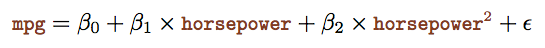

May provide a better fit. The above equation involves predicting mpg using a non-linear function of horsepower. But it is still a linear model! That is, it is simply a multiple linear regression model with X1 = horsepower and X2 = $horsepower^2$. So we can use standard linear regression software to estimate β0, β1, and β2 in order to produce a non-linear fit. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


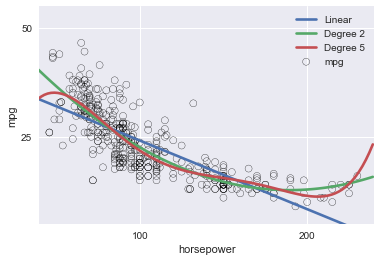

In [38]:
auto = pd.read_csv('Auto.csv', na_values='?').dropna()
auto.info()

# With Seaborn's regplot() you can easily plot higher order polynomials.
sns.set(font_scale=1)
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k') 
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False)
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2', order=2, scatter=False)
sns.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5', order=5, scatter=False)
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);
plt.rcParams['figure.figsize']=(20,10)
sns.set(font_scale=5)

The quadratic fit appears to be substantially better than the fit obtained when just the linear term is included. The $R^2$ of the quadratic fit is 0.688, compared to 0.606 for the linear fit, and the p-value below for the quadratic term is highly significant.

In [39]:
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   

   origin                       name  horsepower2  
0       1  chevrolet chevelle malibu      16900.0  
1       1          buick skylark 320      27225.0  
2       1         plymouth satellite      22500.0  

In [40]:
est = smf.ols('mpg ~ horsepower + horsepower2', auto).fit()
est.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

If including $horsepower^2$ led to such a big improvement in the model, why not include $horsepower^3$ , $horsepower^4$ , or even $horsepower^5$? The red curve displays the fit that results from including all polynomials up to fifth degree in the model. The resulting fit seems unnecessarily wiggly—that is, it is unclear that including the additional terms really has led to a better fit to the data. 

The approach that we have just described for extending the linear model to accommodate non-linear relationships is known as polynomial regres- sion, since we have included polynomial functions of the predictors in the regression model.

## 1.3.3 Potential Problems <a class="anchor" id="problems"></a>
When we fit a linear regression model to a particular data set, many prob- lems may occur. Most common among these are the following:
#### 1. Non-linearity of the response-predictor relationships.
#### 2. Correlation of error terms.
#### 3. Non-constant variance of error terms.
#### 4. Outliers.
#### 5. High-leverage points.
#### 6. Collinearity

### One: Non-linearity of the Data
The linear regression model assumes that there is a straight-line relation- ship between the predictors and the response. If the true relationship is far from linear, then virtually all of the conclusions that we draw from the fit are suspect. In addition, the prediction accuracy of the model can be significantly reduced.

Residual plots are a useful graphical tool for identifying non-linearity. Given a simple linear regression model, we can plot the residuals, $e_i = y_i - \hat{y_i}$, versus the predictor. Ideally, the residual plot will show no discernible pattern. The presence of a pattern may indicate a problem with some aspect of the linear model.

In [46]:
regr = skl_lm.LinearRegression()

# Linear fit
X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg
regr.fit(X, y)

auto['pred1'] = regr.predict(X)
auto['resid1'] = auto.mpg - auto.pred1

# Quadratic fit
X2 = auto[['horsepower', 'horsepower2']].as_matrix()
regr.fit(X2, y)

auto['pred2'] = regr.predict(X2)
auto['resid2'] = auto.mpg - auto.pred2

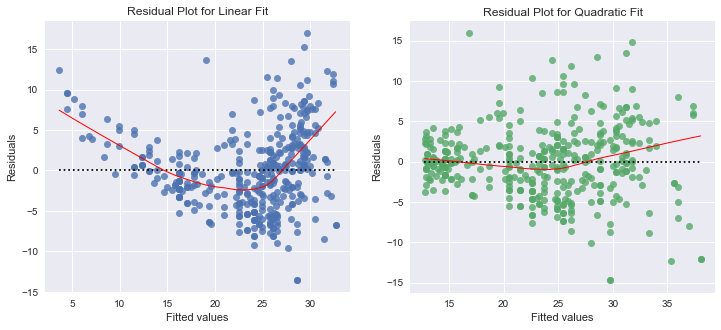

In [47]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

sns.set(font_scale=1)

# Left plot
sns.regplot(auto.pred1, auto.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(auto.pred2, auto.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2)
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

The left panel of above displays a residual plot from the linear regression of mpg onto horsepower on the Auto data set that was illustrated earlier. The red line is a smooth fit to the residuals, which is displayed in order to make it easier to identify any trends. The residuals exhibit a clear U-shape, which provides a strong indication of non-linearity in the data. In contrast, the right-hand panel above displays the residual plot that results from the model, which contains a quadratic term. There appears to be little pattern in the residuals, suggesting that the quadratic term improves the fit to the data.
If the residual plot indicates that there are non-linear associations in the data, then a simple approach is to use non-linear transformations of the predictors, such as logX, √X, and X2, in the regression model.

### Two: Correlation of Error Terms

An important assumption of the linear regression model is that the error terms, ε1, ε2, . . . , εn, are uncorrelated. What does this mean? For instance, if the errors are uncorrelated, then the fact that εi is positive provides little or no information about the sign of εi+1. The standard errors that are computed for the estimated regression coefficients or the fitted values are based on the assumption of uncorrelated error terms. If in fact there is correlation among the error terms, then the estimated standard errors will tend to underestimate the true standard errors. As a result, confi- dence and prediction intervals will be narrower than they should be. For example, a 95 % confidence interval may in reality have a much lower probability than 0.95 of containing the true value of the parameter. In addition, p-values associated with the model will be lower than they should be; this could cause us to erroneously conclude that a parameter is statistically significant. In short, if the error terms are correlated, we may have an unwarranted sense of confidence in our model.

As an extreme example, suppose we accidentally doubled our data, lead- ing to observations and error terms identical in pairs. If we ignored this, our standard error calculations would be as if we had a sample of size 2n, when in fact we have only n samples. Our estimated parameters would be the same for the 2n samples as for the n samples, but the confidence intervals would be narrower by a factor of √2!

Why might correlations among the error terms occur? Such correlations frequently occur in the context of time series data, which consists of ob- servations for which measurements are obtained at discrete points in time. In many cases, observations that are obtained at adjacent time points will have positively correlated errors. In order to determine if this is the case for a given data set, we can plot the residuals from our model as a function of time. If the errors are uncorrelated, then there should be no discernible pat- tern. On the other hand, if the error terms are positively correlated, then we may see tracking in the residuals—that is, adjacent residuals may have similar values. 

Lets look at the figure below to get an idea of how this may happen.

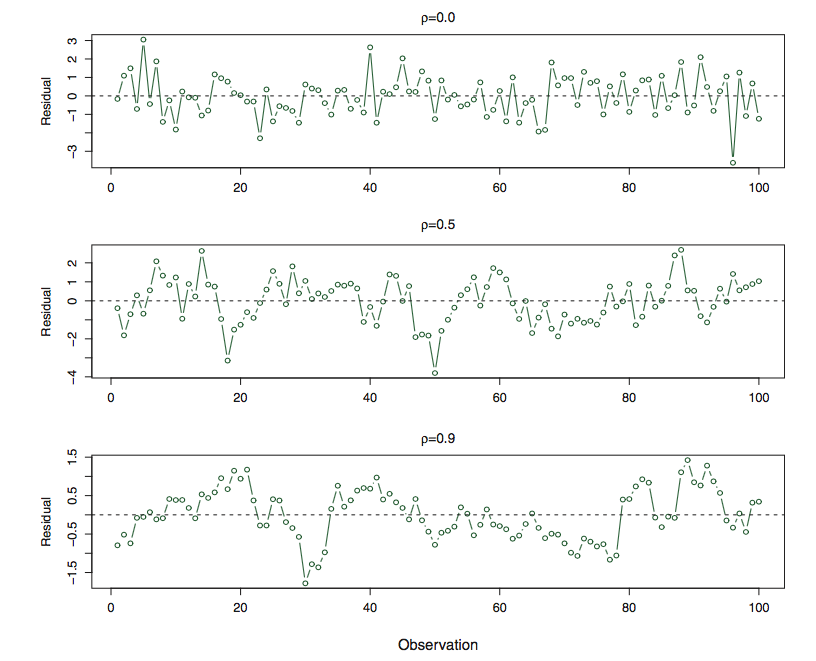

In the top panel, we see the residuals from a linear regression fit to data generated with uncorre- lated errors. There is no evidence of a time-related trend in the residuals. In contrast, the residuals in the bottom panel are from a data set in which adjacent errors had a correlation of 0.9. Now there is a clear pattern in the residuals—adjacent residuals tend to take on similar values. Finally, the center panel illustrates a more moderate case in which the residuals had a correlation of 0.5. There is still evidence of tracking, but the pattern is less clear.

Many methods have been developed to properly take account of corre- lations in the error terms in time series data. Correlation among the error terms can also occur outside of time series data. For instance, consider a study in which individuals’ heights are predicted from their weights. The assumption of uncorrelated errors could be violated if some of the individ- uals in the study are members of the same family, or eat the same diet, or have been exposed to the same environmental factors.

In general, the assumption of uncorrelated errors is extremely important for linear regression as well as for other statistical methods, and good experimental design is crucial in order to mitigate the risk of such correlations.

### Three: Non-constant Variance of Error Terms
Another important assumption of the linear regression model is that the error terms have a constant variance. The standard errors, confidence intervals, and hypothesis tests associated with the linear model rely upon this assumption.

Unfortunately, it is often the case that the variances of the error terms are non-constant. For instance, the variances of the error terms may increase with the value of the response. One can identify non-constant variances in the errors, or heteroscedasticity, from the presence of a funnel shape in the residual plot. An example is shown in the left-hand panel below, in which the magnitude of the residuals tends to increase with the fitted values.

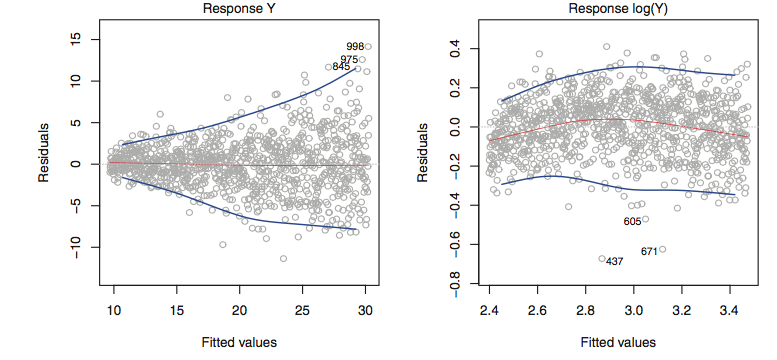

When faced with this problem, one possible solution is√to trans- form the response Y using a concave function such as log Y or sqrt(Y) . Such a transformation results in a greater amount of shrinkage of the larger re- sponses, leading to a reduction in heteroscedasticity. The right hand panel above displays the residual plot after transforming the response using log(Y). The residuals now appear to have constant variance, though there is some evidence of a slight non-linear relationship in the data.

### Four: Outliers
An outlier is a point for which $y_i$ is far from the value predicted by the model. Outliers can arise for a variety of reasons, such as incorrect recording of an observation during data collection.

The red point (observation 20) in the left-hand panel below illustrates a typical outlier.

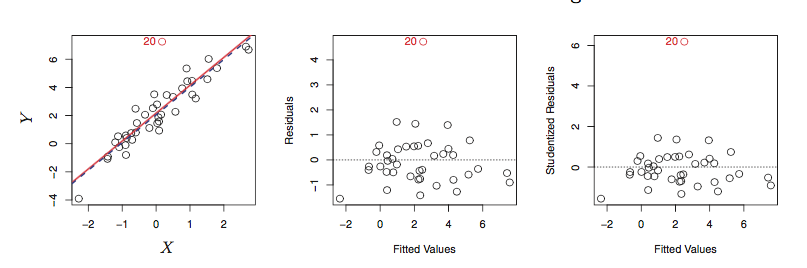

The red solid line is the least squares regression fit, while the blue dashed line is the least squares fit after removal of the outlier. In this case, removing the outlier has little effect on the least squares line: it leads to almost no change in the slope, and a miniscule reduction in the intercept. It is typical for an outlier that does not have an unusual predictor value to have little effect on the least squares fit.

However, even if an outlier does not have much effect on the least squares fit, it can cause other problems. For instance, in this example, the RSE is 1.09 when the outlier is included in the regression, but it is only 0.77 when the outlier is removed. Since the RSE is used to compute all confidence intervals and p-values, such a dramatic increase caused by a single data point can have implications for the interpretation of the fit. Similarly, inclusion of the outlier causes the R2 to decline from 0.892 to 0.805.

Residual plots can be used to identify outliers. In this example, the out- lier is clearly visible in the residual plot illustrated in the center panel the figure above. But in practice, it can be difficult to decide how large a residual needs to be before we consider the point to be an outlier. To address this problem, instead of plotting the residuals, we can plot the studentized residuals, computed by dividing each residual ei by its estimated standard error. Observations whose studentized residuals are greater than 3 in absolute value are possible outliers. In the right-hand panel above, the outlier’s studentized residual exceeds 6, while all other observations have studentized residuals between −2 and 2.

If we believe that an outlier has occurred due to an error in data collec- tion or recording, then one solution is to simply remove the observation. However, care should be taken, since an outlier may instead indicate a deficiency with the model, such as a missing predictor.


### Five: High Leverage Points
We just saw that outliers are observations for which the response $y_i$ is unusual given the predictor $x_i$. In contrast, observations with high leverage have an unusual value for $x_i$. 

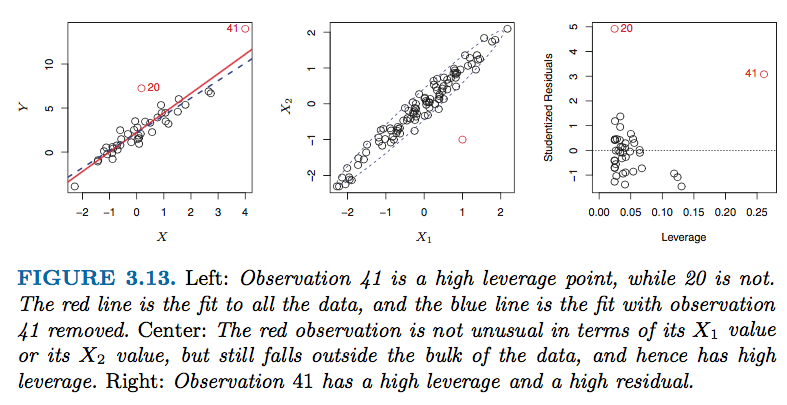

For example, observation 41 in the left-hand  panel of above has high leverage, in that the predictor value for this observation is large relative to the other observations. The red solid line is the least squares fit to the data, while the blue dashed line is the fit produced when observation 41 is removed. Comparing the left-hand
panels of the outliers figure and the leverage point figure above, we observe that removing the high leverage observation has a much more substantial impact on the least squares line than removing the outlier. **In fact, high leverage observations tend to have a sizable impact on the estimated regression line.** It is cause for concern if the least squares line is heavily affected by just a couple of observations, because any problems with these points may invalidate the entire fit. **For this reason, it is important to identify high leverage observations.**

In a simple linear regression, high leverage observations are fairly easy to identify, since we can simply look for observations for which the predictor value is outside of the normal range of the observations. But in a multiple linear regression with many predictors, it is possible to have an observation that is well within the range of each individual predictor’s values, but that is unusual in terms of the full set of predictors. An example is shown in the center panel above, for a data set with two predictors, X1 and X2. Most of the observations’ predictor values fall within the blue dashed ellipse, but the red observation is well outside of this range. But neither its value for X1 nor its value for X2 is unusual. So if we examine just X1 or just X2, we will fail to notice this high leverage point. This problem is more pronounced in multiple regression settings with more than two predictors, because then there is no simple way to plot all dimensions of the data simultaneously.

In order to quantify an observation’s leverage, we compute the **leverage statistic**. A large value of this statistic indicates an observation with high leverage leverage.

The right-hand panel above provides a plot of the studentized residuals versus $h_i$ for the data in the left-hand panel above. Observation 41 stands out as having a very high leverage statistic as well as a high studentized residual. In other words, it is an outlier as well as a high leverage observation. **This is a particularly dangerous combination!** This plot also reveals the reason that observation 20 had relatively little effect on the least squares fit in the outliers figure: it has low leverage.

### Six: Collinearity
**Collinearity** refers to the situation in which two or more predictor variables are closely related to one another. Lets take a look at the concept of collinearity below.

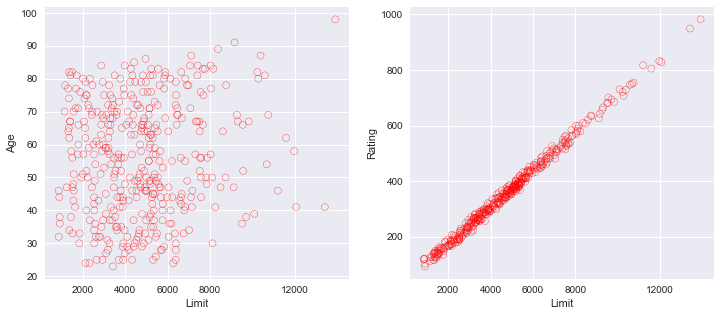

In [43]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.scatter(credit.Limit, credit.Age, facecolor='None', edgecolor='r')
ax1.set_ylabel('Age')

# Right plot
ax2.scatter(credit.Limit, credit.Rating, facecolor='None', edgecolor='r')
ax2.set_ylabel('Rating')

for ax in fig.axes:
    ax.set_xlabel('Limit')
    ax.set_xticks([2000,4000,6000,8000,12000])

In the left-hand panel above, the two predictors limit and age appear to have no obvious relationship. In contrast, in the right-hand panel, the predictors limit and rating are very highly correlated with each other, and we say that they are collinear (in other words if one increases, the other increases!!!).

The presence of collinearity can pose problems in the regression context, since it can be difficult to separate out the individual effects of collinear variables on the response. **In other words, since limit and rating tend to increase or decrease together, it can be difficult to determine how each one separately is associated with the response, balance.**

The two figures below illustrate some of hte difficulties that can result from collinearity. 

Age/Limit
 520.015
[-2.29148553  0.17336497]

Rating/Limit
 520.015
[ 2.20167217  0.02451438]


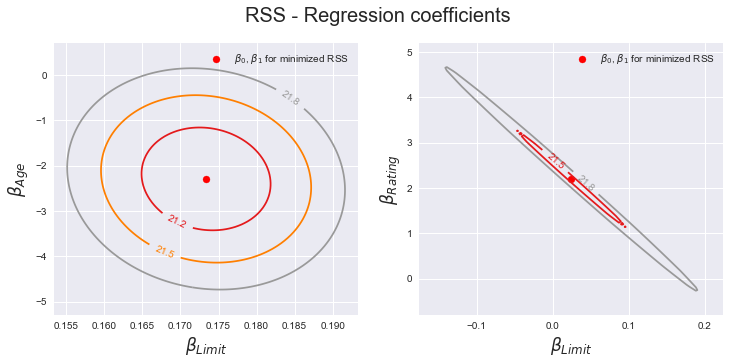

In [44]:
y = credit.Balance

# Regression for left plot
X = credit[['Age', 'Limit']].as_matrix()
regr1 = skl_lm.LinearRegression()
regr1.fit(scale(X.astype('float'), with_std=False), y)
print('Age/Limit\n',regr1.intercept_)
print(regr1.coef_)

# Regression for right plot
X2 = credit[['Rating', 'Limit']].as_matrix()
regr2 = skl_lm.LinearRegression()
regr2.fit(scale(X2.astype('float'), with_std=False), y)
print('\nRating/Limit\n',regr2.intercept_)
print(regr2.coef_)

# ----------------------------------------------------------------

# Create grid coordinates for plotting
B_Age = np.linspace(regr1.coef_[0]-3, regr1.coef_[0]+3, 100)
B_Limit = np.linspace(regr1.coef_[1]-0.02, regr1.coef_[1]+0.02, 100)

B_Rating = np.linspace(regr2.coef_[0]-3, regr2.coef_[0]+3, 100)
B_Limit2 = np.linspace(regr2.coef_[1]-0.2, regr2.coef_[1]+0.2, 100)

X1, Y1 = np.meshgrid(B_Limit, B_Age, indexing='xy')
X2, Y2 = np.meshgrid(B_Limit2, B_Rating, indexing='xy')
Z1 = np.zeros((B_Age.size,B_Limit.size))
Z2 = np.zeros((B_Rating.size,B_Limit2.size))

Limit_scaled = scale(credit.Limit.astype('float'), with_std=False)
Age_scaled = scale(credit.Age.astype('float'), with_std=False)
Rating_scaled = scale(credit.Rating.astype('float'), with_std=False)

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z1):
    Z1[i,j] =((y - (regr1.intercept_ + X1[i,j]*Limit_scaled +
                    Y1[i,j]*Age_scaled))**2).sum()/1000000
    
for (i,j),v in np.ndenumerate(Z2):
    Z2[i,j] =((y - (regr2.intercept_ + X2[i,j]*Limit_scaled +
                    Y2[i,j]*Rating_scaled))**2).sum()/1000000
# ----------------------------------------------------------------

fig = plt.figure(figsize=(12,5))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
    
# Left plot
CS = ax1.contour(X1, Y1, Z1, cmap=plt.cm.Set1, levels=[21.25, 21.5, 21.8])
ax1.scatter(regr1.coef_[1], regr1.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax1.set_ylabel(r'$\beta_{Age}$', fontsize=17)

# Right plot
CS = ax2.contour(X2, Y2, Z2, cmap=plt.cm.Set1, levels=[21.5, 21.8])
ax2.scatter(regr2.coef_[1], regr2.coef_[0], c='r', label=min_RSS)
ax2.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
ax2.set_ylabel(r'$\beta_{Rating}$', fontsize=17)
ax2.set_xticks([-0.1, 0, 0.1, 0.2])

for ax in fig.axes:
    ax.set_xlabel(r'$\beta_{Limit}$', fontsize=17)
    ax.legend()

    
    

The left-hand panel above is a contour plot of the RSS (think cost!) associated with different possible coefficient estimates for the regression of balance on limit and age. Each ellipse represents a set of coefficients that correspond to the same RSS, with ellipses nearest to the center tak- ing on the lowest values of RSS.

The Red dots represent the coefficient estimates that result in the smallest possible RSS-in other words, these are the least squares estimates. The axes for limit and age have been scaled so that the plot includes possible coeffi- cient estimates that are up to four standard errors on either side of the least squares estimates. Thus the plot includes all plausible values for the coefficients. For example, we see that the true limit coefficient is almost certainly somewhere between 0.15 and 0.20.

In contrast, the right-hand panel displays contour plots of the RSS associated with possible coefficient estimates for the regression of balance onto limit and rating, which we know to be highly collinear. Now the contours run along a narrow valley; there is a broad range of values for the coefficient estimates that result in equal values for RSS. **Hence a small change in the data could cause the pair of coefficient values that yield the smallest RSS—that is, the least squares estimates—to move anywhere along this valley. This results in a great deal of uncertainty in the coefficient estimates.**

Notice that the scale for the limit coefficient now runs from roughly −0.2 to 0.2; this is an eight-fold increase over the plausible range of the limit coefficient in the regression with age. Interestingly, even though the limit and rating coefficients now have much more individual uncertainty, they will almost certainly lie somewhere in this contour valley. For example, we would not expect the true value of the limit and rating coefficients to be −0.1 and 1 respectively, even though such a value is plausible for each coefficient individually.


Since collinearity reduces the accuracy of the estimates of the regression coefficients, it causes the standard error for $\hat{\beta^j}$ to grow. Recall that the t-statistic for each predictor is calculated by dividing $\hat{\beta^j}$ by its standard error. **Consequently, collinearity results in a decline in the t-statistic. As a result, in the presence of collinearity, we may fail to reject H0 : βj = 0. This means that the power of the hypothesis test—the probability of correctly detecting a non-zero coefficient—is reduced by collinearity.**

Lets look the coefficient estimates more closely below.

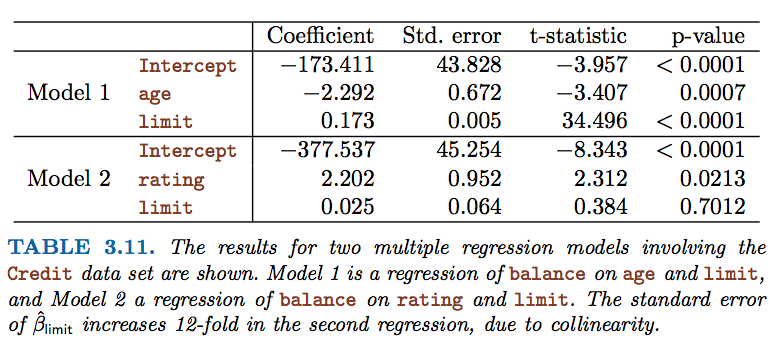

The table above compares the coefficient estimates obtained from two separate multiple regression models. The first is a regression of balance on age and limit, and the second is a regression of balance on rating and limit. In the first regression, both age and limit are highly significant with very small p- values. In the second, the collinearity between limit and rating has caused the standard error for the limit coefficient estimate to increase by a factor of 12 and the p-value to increase to 0.701. In other words, the importance of the limit variable has been masked due to the presence of collinearity. To avoid such a situation, it is desirable to identify and address potential collinearity problems while fitting the model.

A simple way to detect collinearity is to look at the correlation matrix of the predictors. **An element of this matrix that is large in absolute value indicates a pair of highly correlated variables, and therefore a collinearity problem in the data.**

Unfortunately, not all collinearity problems can be detected by inspection of the correlation matrix: it is possible for collinear- ity to exist between three or more variables even if no pair of variables has a particularly high correlation. We call this situation multicollinearity.

Instead of inspecting the correlation matrix, a better way to assess multi- collinearity is to compute the variance inflation factor (VIF). The VIF is the ratio of the variance of βˆj when fitting the full model divided by the variance of βˆj if fit on its own. **The smallest possible value for VIF is 1, which indicates the complete absence of collinearity.** Typically in practice there is a small amount of collinearity among the predictors. As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity. 

Lets take a look at the VIFs from our example.

In [45]:
est_Age = smf.ols('Age ~ Rating + Limit', credit).fit()
est_Rating = smf.ols('Rating ~ Age + Limit', credit).fit()
est_Limit = smf.ols('Limit ~ Age + Rating', credit).fit()

print(1/(1-est_Age.rsquared))
print(1/(1-est_Rating.rsquared))
print(1/(1-est_Limit.rsquared))

1.01138468607
160.668300959
160.592879786


In the Credit data, a regression of balance on age, rating, and limitindicates that the predictors have VIF values of 1.01, 160.67, and 160.59. As we suspected, there is considerable collinearity in the data!

When faced with the problem of collinearity, there are two simple solutions. **The first is to drop one of the problematic variables from the regres- sion. This can usually be done without much compromise to the regression fit, since the presence of collinearity implies that the information that this variable provides about the response is redundant in the presence of the other variables.** For instance, if we regress balance onto age and limit, without the rating predictor, then the resulting VIF values are close to the minimum possible value of 1, and the R2 drops from 0.754 to 0.75. So dropping rating from the set of predictors has effectively solved the collinearity problem without compromising the fit.

**The second solution is to combine the collinear variables together into a single predictor. For in- stance, we might take the average of standardized versions of limit and rating in order to create a new variable that measures credit worthiness.**

# 1.4 The Marketing Plan <a class="anchor" id="marketing-plan"></a>
With that said we have wrapped up the components of our linear regression investigation! Lets take a second to return to the seven questions that we set out to answer at the start of the chapter! This is the review of *everything* we have talked about so far and may be the most important takeaway, so go over this slowly!

### 1. Is there a relationship between advertising sales and budget?
This question can be answered by fitting a **multiple regression model** of sales onto TV, radio, and newspaper, and testing the hypothesis $H_0 : β_{TV} = β{radio} = β{newspaper} = 0$. We showed that the **F-statistic** can be used to determine whether or not we should reject this null hypothesis. In this case the p-value corresponding to the F-statistic is very low, indicating clear evidence of a relationship between advertising and sales!

### 2. How strong is the relationship?
We discussed two measures of model accuracy:
1. First, the RSE estimates the standard deviation of the response from the population regression line. For the Advertising data, the RSE is 1,681 units while the mean value for the response is 14,022, indicating a percentage error of roughly 12%.
2. Second, the $R^2$ statistic records the percentage of variability in the response that is explained by the predictors. The predictors explain almost 90 % of the variance in sales. The $RSE$ and $R^2$ statistics are displayed in tables above (and table 3.6 in the book)

### 3. Which media contribute to sales?
To answer this question, we can examine the p-values associated with each predictor’s t-statistic. In the multiple linear regression table, the p-values for TV and radio are low, but the p-value for newspaper is not. This suggests that only TV and radio are related to sales.
 
### 4. How large is the effect of each medium on sales?
We saw that the standard error of $\hat{\beta_j}$ can be used to construct confidence intervals for $\beta_j$. For the Advertising data, the 95% confidence intervals are as follows: (0.043,0.049) for TV, (0.172, 0.206) for radio, and (−0.013, 0.011) for newspaper. The confi- dence intervals for TV and radio are narrow and far from zero, provid- ing evidence that these media are related to sales. But the interval for newspaper includes zero, indicating that the variable is not statis- tically significant given the values of TV and radio.


We saw that collinearity can result in very wide standard errors. Could collinearity be the reason that the confidence interval associated with newspaper is so wide? The VIF scores are 1.005, 1.145, and 1.145 for TV, radio, and newspaper, suggesting no evidence of collinearity.

In order to assess the association of each medium individually on sales, we can perform three separate simple linear regressions. Results are shown in tables above (3.1 and 3.3 in book). There is evidence of an extremely strong association between TV and sales and between radio and sales. There is evidence of a mild association between newspaper and sales, when the values of TV and radio are ignored.
 
### 5. How accurately can we predict future sales?
The response can be predicted using:
$$Y = \beta_0 +\beta_1X_1 +\beta_2X_2+...++\beta_pX_p+\epsilon$$
The accuracy associated with this estimate depends on whether we wish to predict an individual response:
$$Y = f(X) + \epsilon$$
or the average response:
$$Y = f(X)$$

If the former, we use a **prediction interval**, and if the latter, we use a **confidence interval**.

Prediction intervals will always be wider than confidence intervals because they account for the uncertainty associated with $\epsilon$, the irreducible error.

### 6. Is the relationship linear?
We saw that residual plots can be used in order to identify non-linearity. **If the relationships are linear, then the residual plots should display no pattern.** In the case of the Advertising data, we observe a non-linear effect in Figure 3.5, though this effect could also be observed in a residual plot. We then discussed the inclusion of transformations of the predictors in the linear regression model in order to accommodate non-linear relationships.

### 7. Is there synergy among the advertising media?
The standard linear regression model assumes an additive relationship between the predictors and the response. **An additive model is easy to interpret because the effect of each predictor on the response is unrelated to the values of the other predictors.** However, the additive assumption may be unrealistic for certain data sets. We showed how to include an interaction term in the regression model in order to accommodate non-additive relationships. A small p-value associated with the interaction term indicates the presence of such relationships. We showed that the Advertising data may not be additive. Including an interaction term in the model results in a substantial increase in $R^2$, from around 90 % to almost 97 %, meaning we explain **more of the variance**!

# 1.5 Comparison with K-Nearest Neighbors <a class="anchor" id="knn"></a>
To wrap up this walk through lets go through a quick comparision of linear regression to K-Nearest Neighbor. As we discussed, linear regression is an example of a parametric approach because it assumes a linear functional form for f(X). 

Parametric methods have several advantages. They are often easy to fit, because one need estimate only a small number of coefficients. In the case of linear re- gression, the coefficients have simple interpretations, and tests of statistical significance can be easily performed. **But parametric methods do have a disadvantage: by construction, they make strong assumptions about the form of f(X).** If the specified functional form is far from the truth, and prediction accuracy is our goal, then the parametric method will perform poorly. For instance, if we assume a linear relationship between X and Y but the true relationship is far from linear, then the resulting model will provide a poor fit to the data, and any conclusions drawn from it will be suspect.

In contrast, non-parametric methods do not explicitly assume a parametric form for f(X), and thereby provide an alternative and more flexible approach for performing regression. 

Lets consider one of the simplest and best-known non-parametricmethods,K nearest neighbors regression (KNN regression).

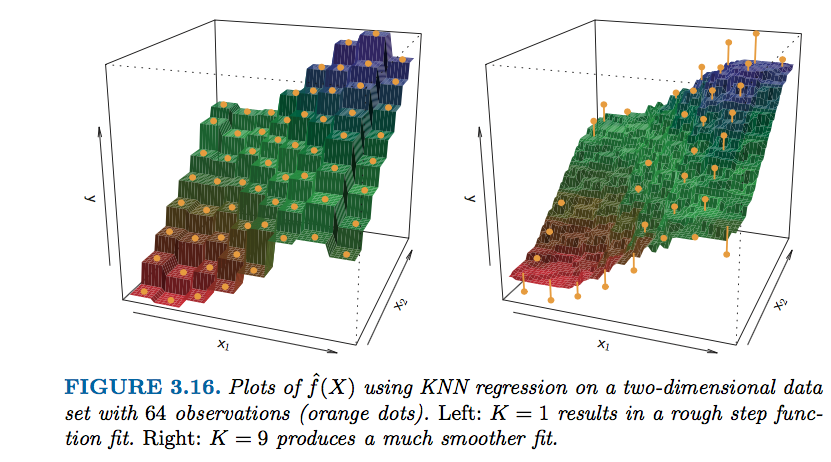

The figure above illustrates two KNN fits on a data set with p = 2 predictors. The fit with K = 1 is shown in the left-hand panel, while the right-hand panel corresponds to K = 9. We see that when K = 1, the KNN fit perfectly interpolates the training observations, and consequently takes the form of a step function. When K = 9, the KNN fit still is a step function, but averaging over nine observations results in much smaller regions of constant prediction, and consequently a smoother fit.

In general, the optimal value for K will depend on the bias-variance tradeoff, which we introduced in the chapter two coverage. A small value for K provides the most flexible fit, which will have low bias but high variance. This variance is due to the fact that the prediction in a given region is entirely dependent on just one observation. In contrast, larger values of K provide a smoother and less variable fit; the prediction in a region is an average of several points, and so changing one observation has a smaller effect. However, the smoothing may cause bias by masking some of the structure in f(X). 

#### In what setting will a parametric approach such as least squares linear re- gression outperform a non-parametric approach such as KNN regression? 
The answer is simple: the parametric approach will outperform the non-parametric approach if the parametric form that has been selected is close to the true form of f .

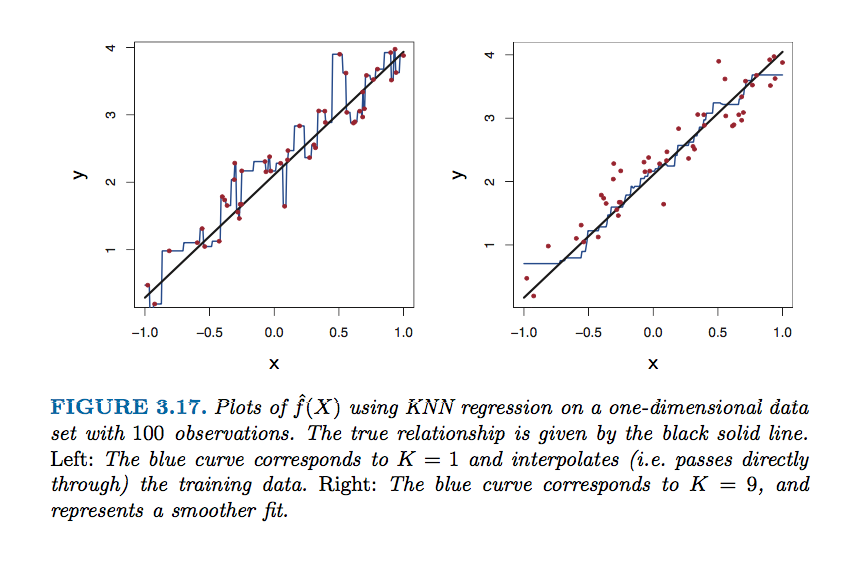

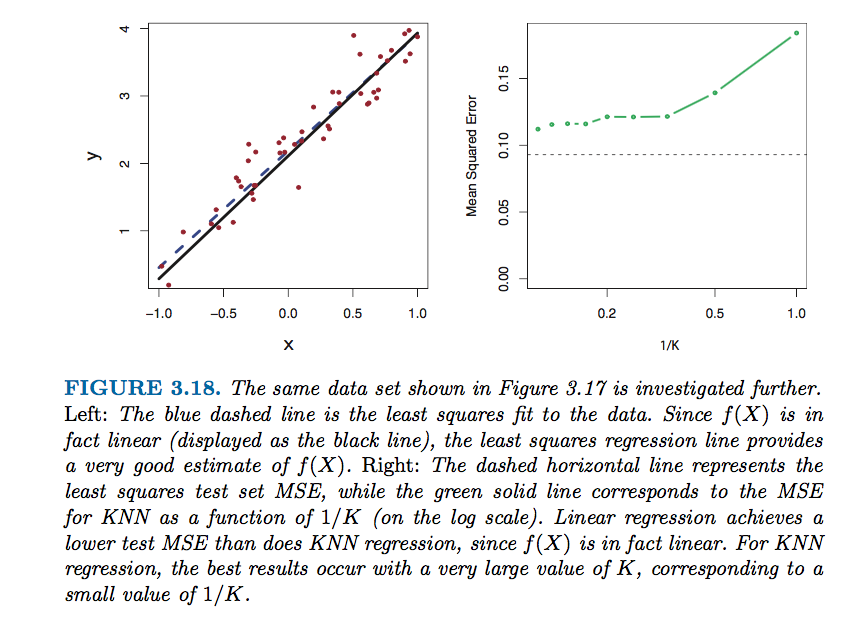

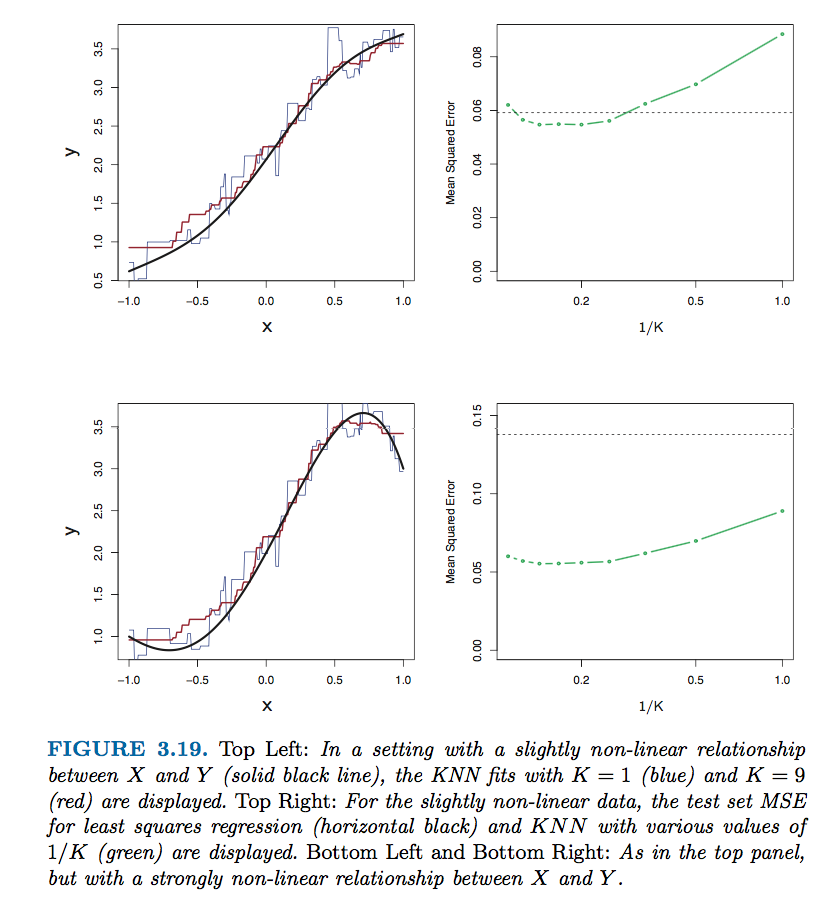

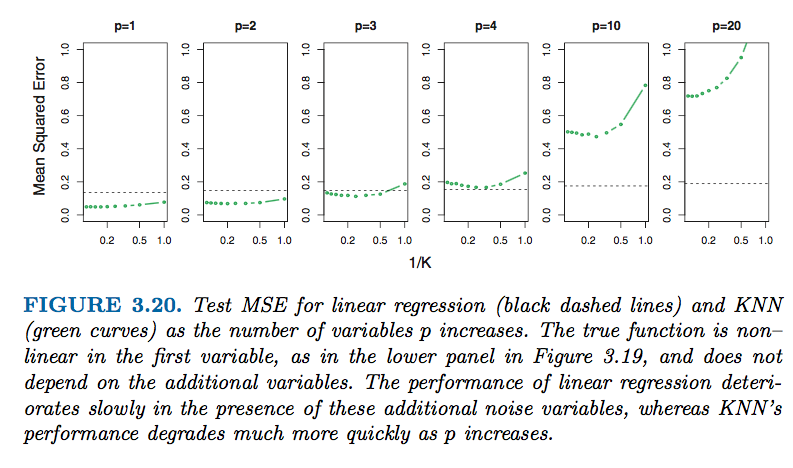

As a general rule, parametric methods will tend to outperform non-parametric approaches when there is a small number of observations per predictor.

Even in problems in which the dimension is small, we might prefer linear regression to KNN from an interpretability standpoint. If the test MSE of KNN is only slightly lower than that of linear regression, we might be willing to forego a little bit of prediction accuracy for the sake of a simple model that can be described in terms of just a few coefficients, and for which p-values are available.

# Next Steps
And with that this intro to Linear Regression from a Statistical Learning perspective is complete! To learn more check out my other notebooks, particularly the one regarding Logistic Regression from a machine learning perspective!

Thanks for following along!